<a href="https://colab.research.google.com/github/VladMarianciuc/Math/blob/main/ProiectStatistica%5BEchipa_Racheta%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1)
NR <- 10^5

Abinom <- function(n){
  X <- replicate(
    NR,
    sum(rbinom(n, 12, 0.5))/n
  )
  E <- 6
  S <- sqrt(3)
  X <- (X-E)*sqrt(n)/S
  return(X)
}

Ageom <- function(n){
  X <- replicate(
    NR,
    sum(rgeom(n, 0.5))/n
  )
  E <- 1
  S <- sqrt(2)
  X <- (X-E)*sqrt(n)/S
  return(X)
}

Apois <- function(n){
  X <- replicate(
    NR,
    sum(rpois(n, 0.5))/n
  )
  E <- 0.5
  S <- sqrt(0.5)
  X <- (X-E)*sqrt(n)/S
  return(X)
}

AunifD <- function(n){
  X <- replicate(
    NR,
    sum(floor(runif(n, -1, 2)))/n
  )
  E <- 0
  S <- sqrt(2/3)
  X <- (X-E)*sqrt(n)/S
  return(X)
}

Aunif <- function(n){
  X <- replicate(
    NR,
    sum(runif(n, -1, 1))/n
  )
  E <- 0
  S <- sqrt(1/3)
  X <- (X-E)*sqrt(n)/S
  return(X)
}

Aexp <- function(n){
  X <- replicate(
    NR,
    sum(rexp(n, 0.5))/n
  )
  E <- 2
  S <- 2
  X <- (X-E)*sqrt(n)/S
  return(X)
}

Agamma <- function(n){
  X <- replicate(
    10^4,
    sum(rgamma(n, 0.5))/n
  )
  E <- 0.5
  S <- sqrt(0.5)
  X <- (X-E)*sqrt(n)/S
  return(X)
}

Abeta <- function(n){
  X <- replicate(
    NR,
    sum(rbeta(n, 2, 3))/n
  )
  E <- 2/5
  S <- 1/5
  X <- (X-E)*sqrt(n)/S
  return(X)
}

# Cumulativa empirica a lui Zn, depinzand de observatiile din repartitie
CZ <- function(x, v){
  return(length(v[v<=x])/length(v))
}

fixCZ <- function(V){
  CZfixed <- function(x){
    return(CZ(x, V))
  }
  return(CZfixed)
}


# 2)

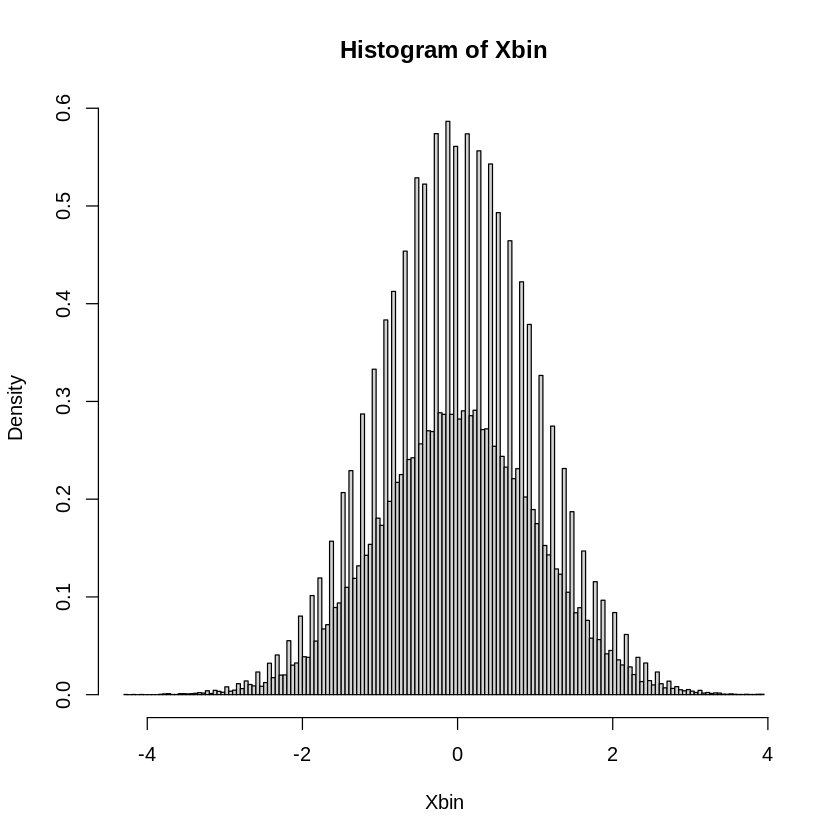

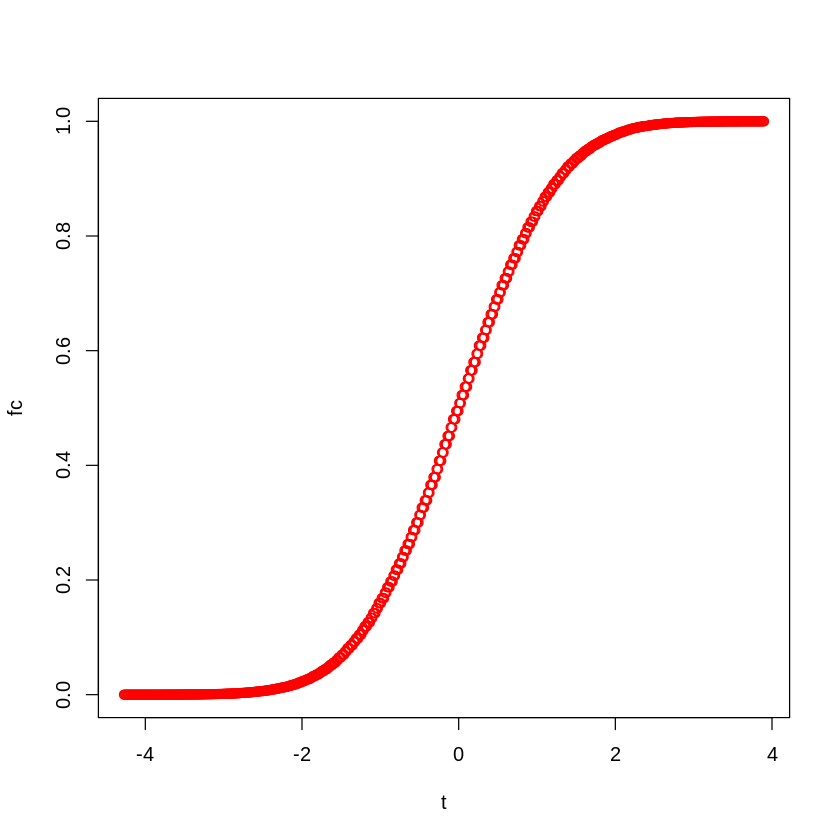

In [2]:
Xbin <- Abinom(250)

t <- seq(min(Xbin), max(Xbin), 0.01)
hist(Xbin, freq = F, breaks = 'FD')

fc <- sapply(t, fixCZ(Xbin))
plot(t, fc, col = 'red')


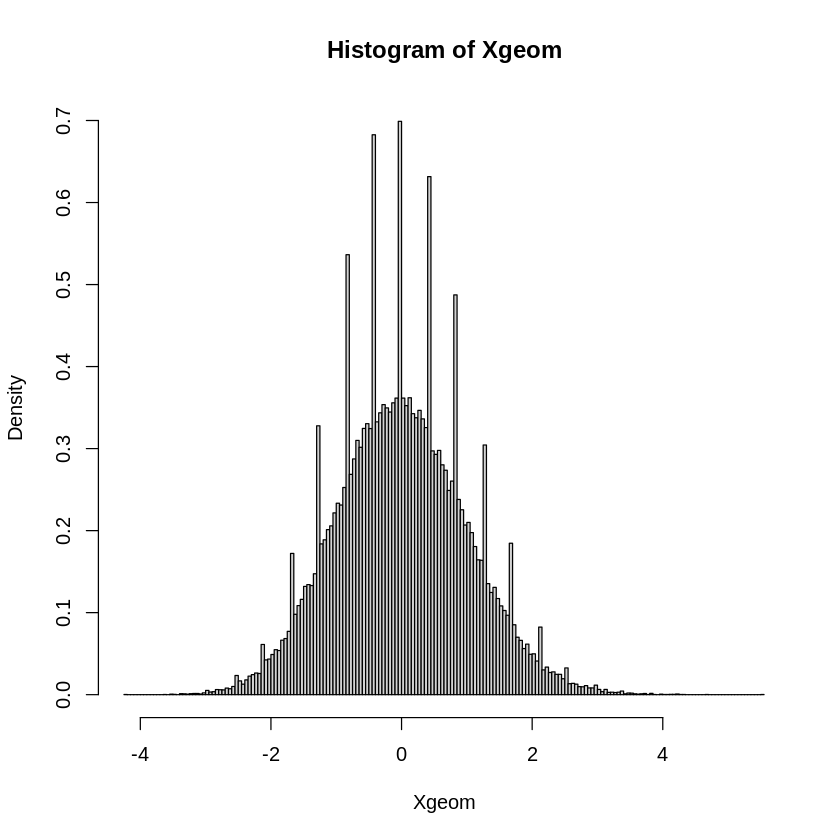

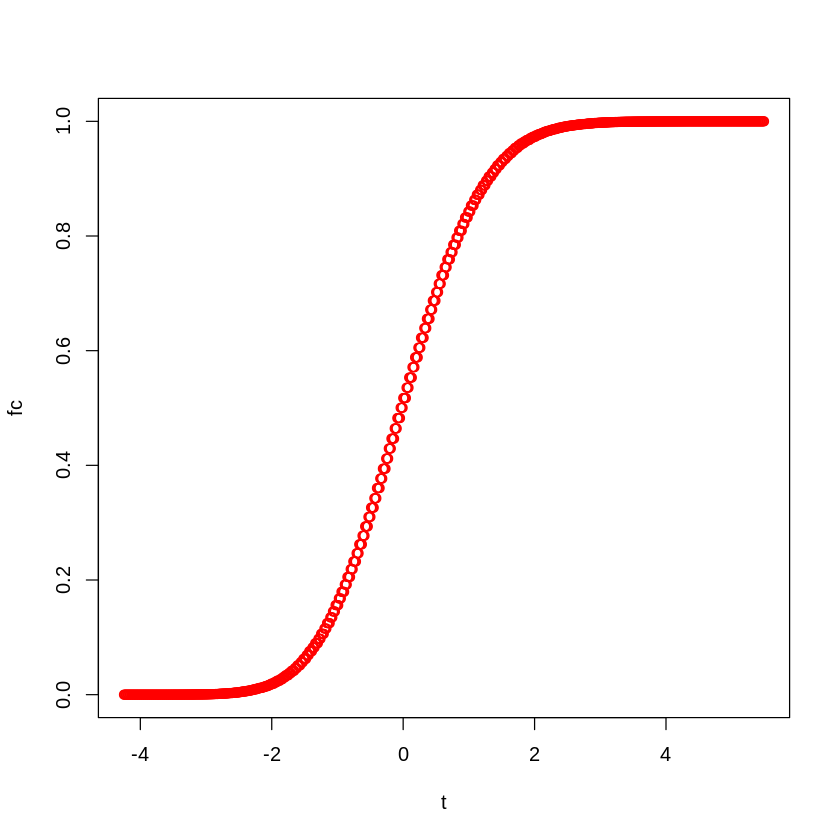

In [3]:
Xgeom <- Ageom(250)

t <- seq(min(Xgeom), max(Xgeom), 0.01)
hist(Xgeom, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=Xgeom)
plot(t, fc, col = 'red')


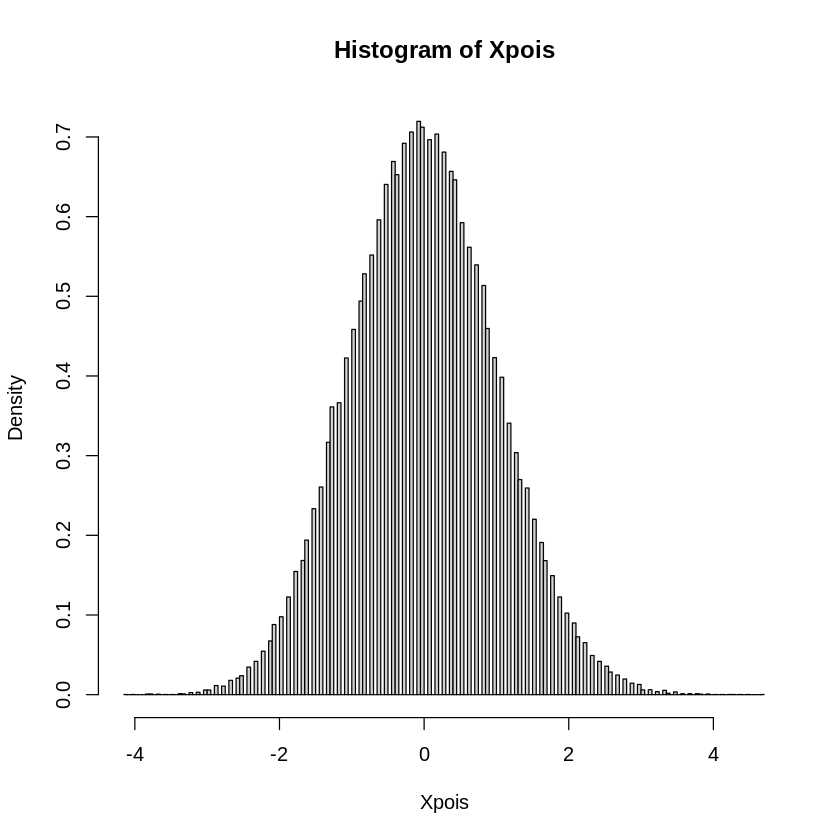

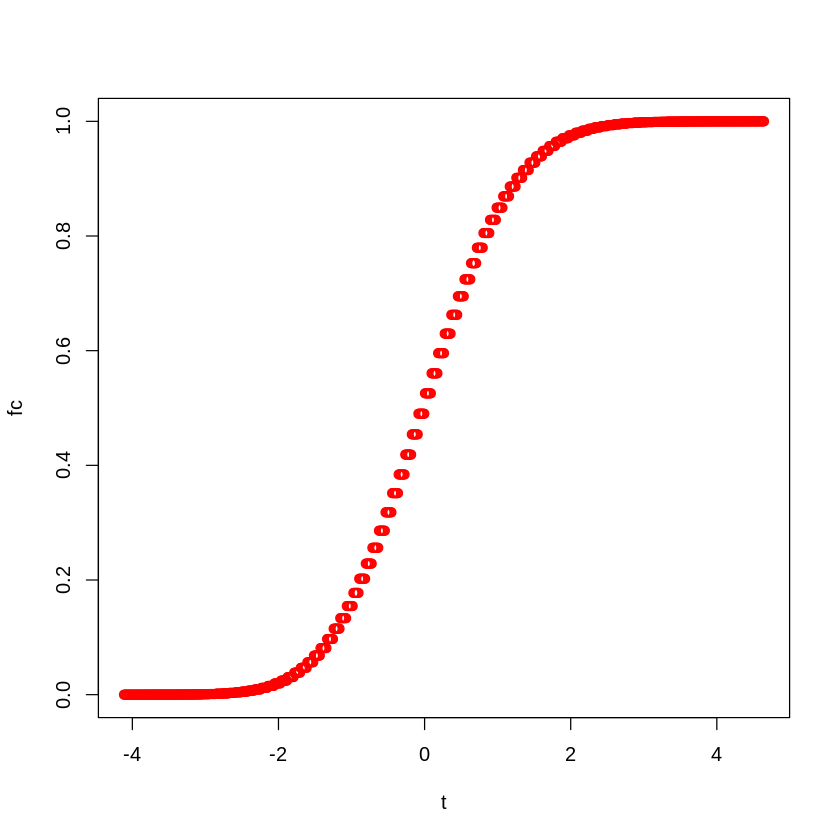

In [4]:
Xpois <- Apois(250)

t <- seq(min(Xpois), max(Xpois), 0.01)
hist(Xpois, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=Xpois)
plot(t, fc, col = 'red')


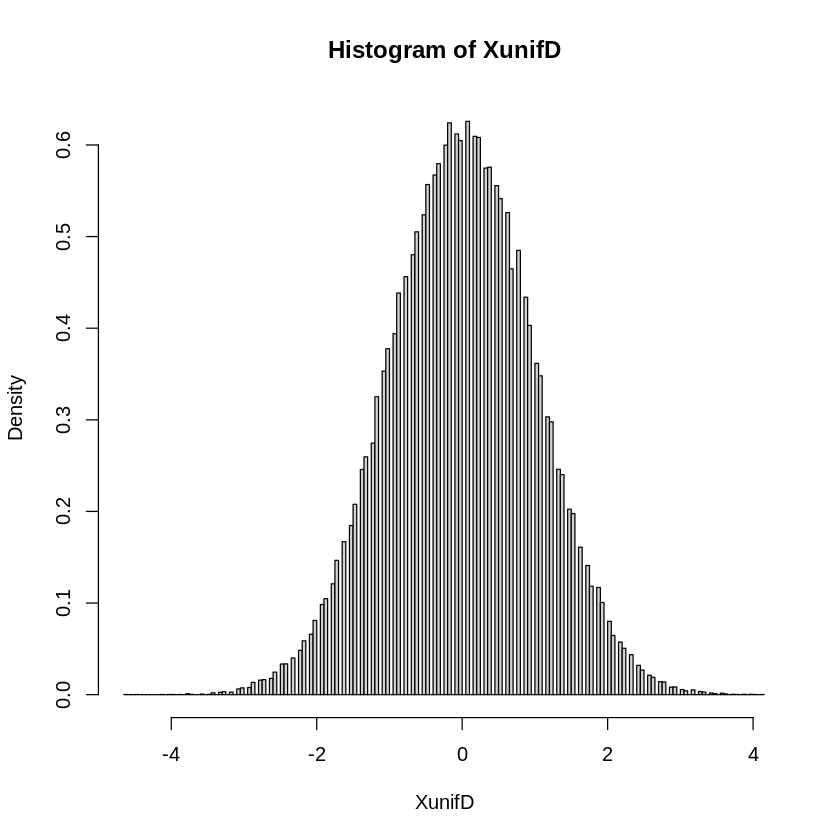

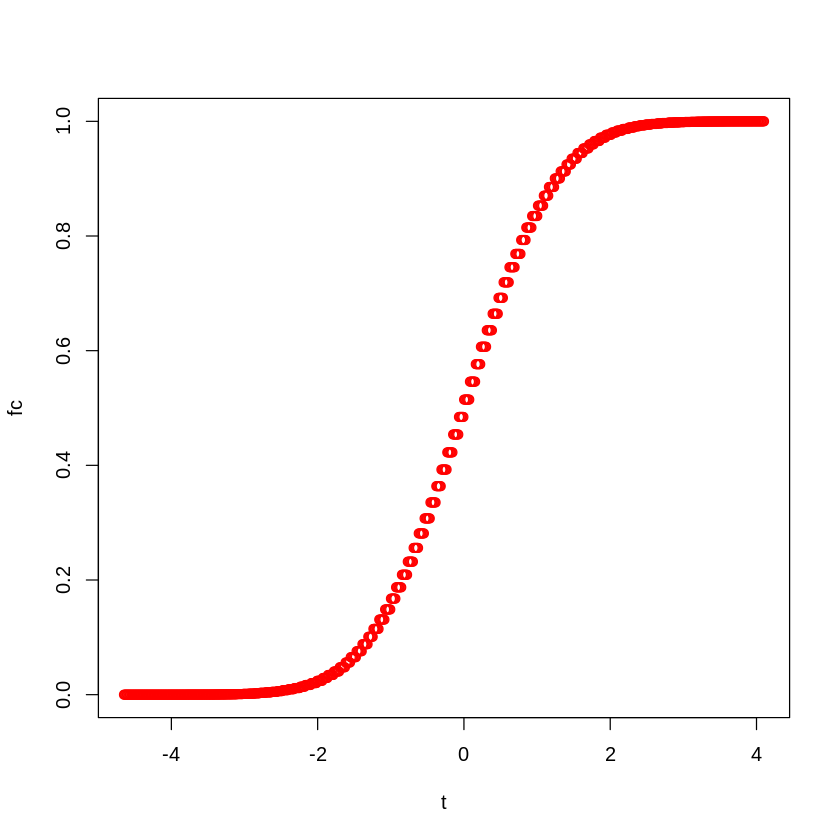

In [5]:
XunifD <- AunifD(250)

t <- seq(min(XunifD), max(XunifD), 0.01)
hist(XunifD, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=XunifD)
plot(t, fc, col = 'red')


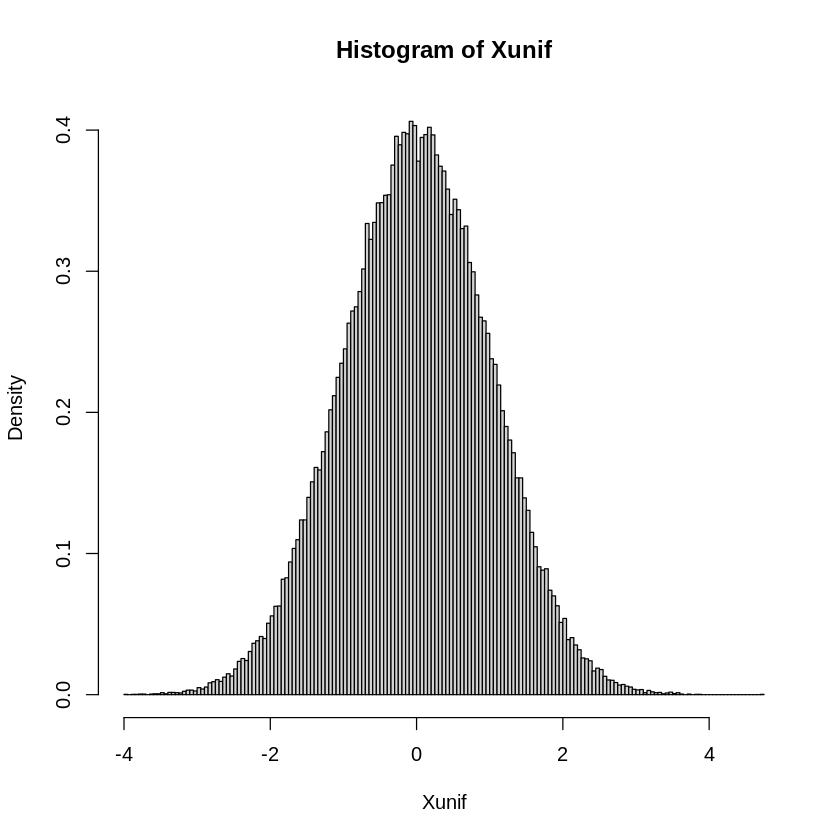

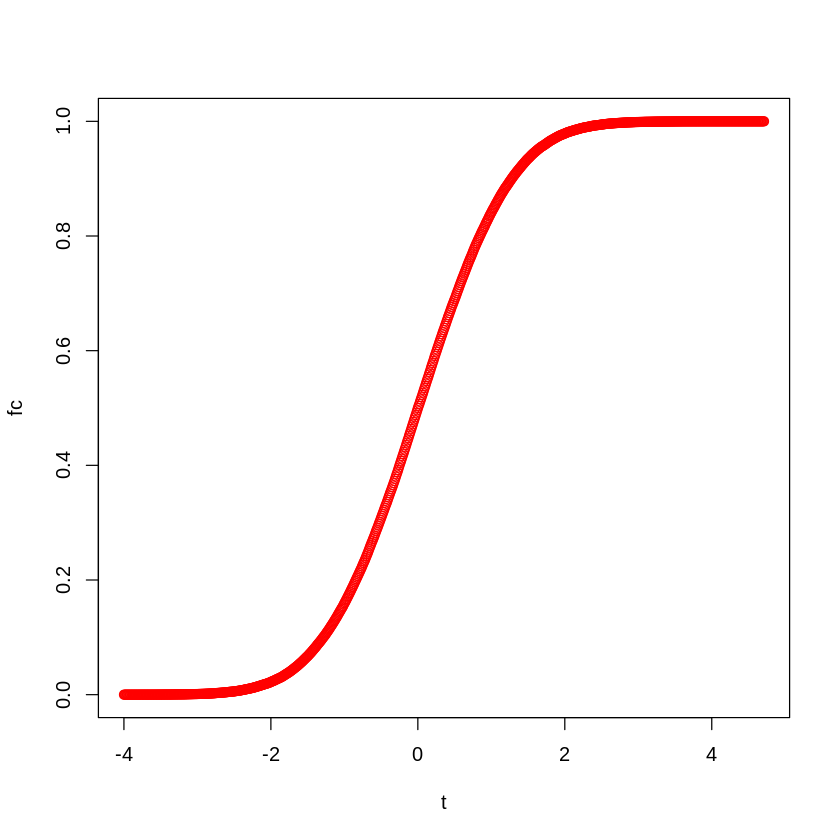

In [6]:
Xunif <- Aunif(250)

t <- seq(min(Xunif), max(Xunif), 0.01)
hist(Xunif, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=Xunif)
plot(t, fc, col = 'red')


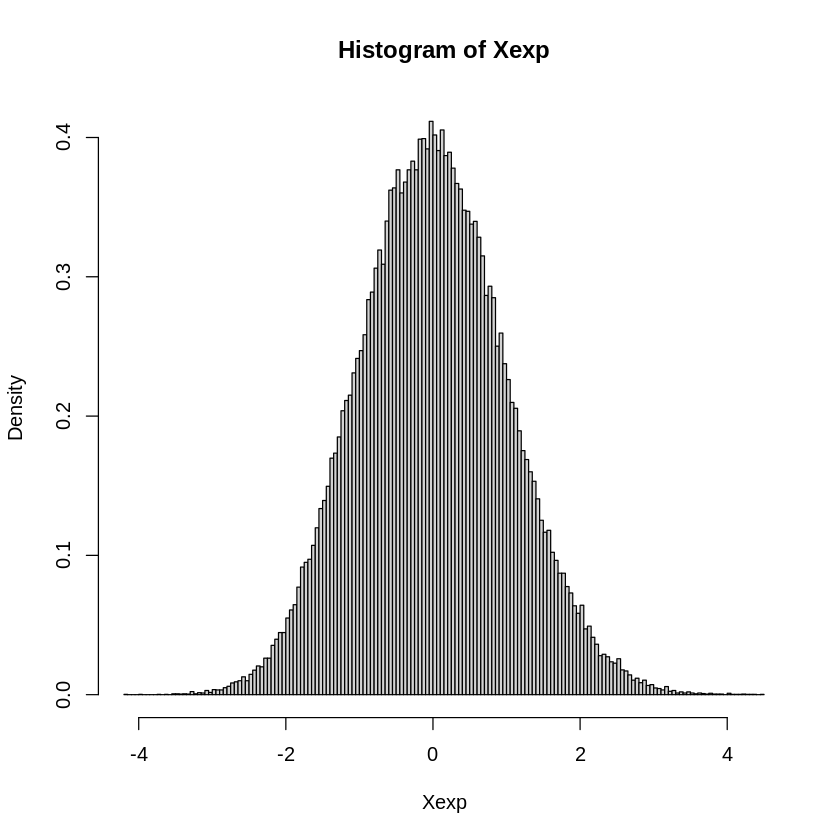

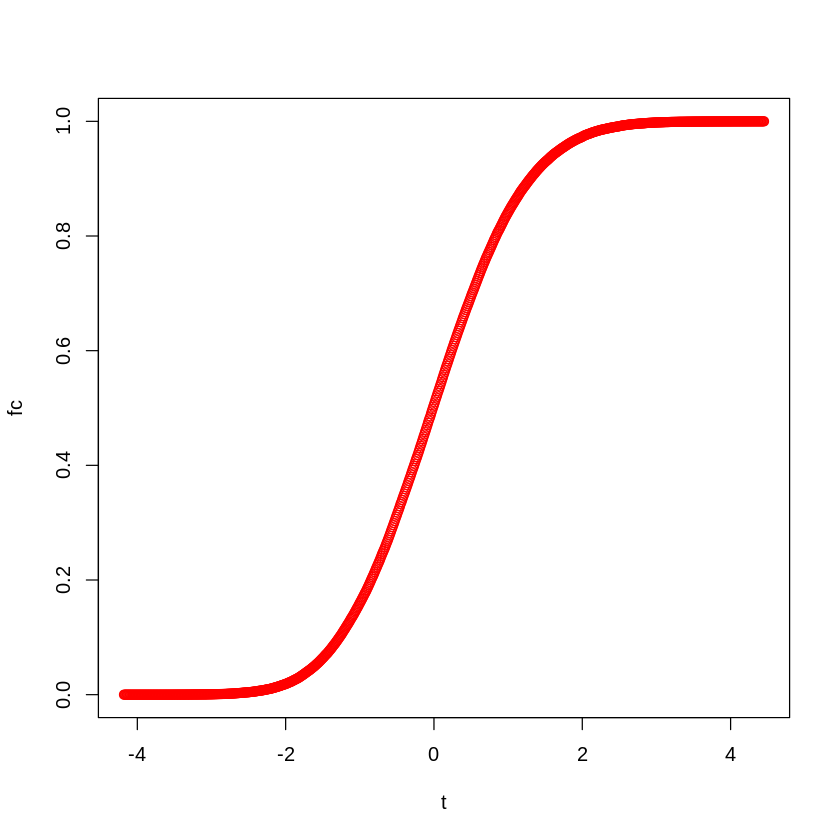

In [7]:
Xexp <- Aexp(250)

t <- seq(min(Xexp), max(Xexp), 0.01)
hist(Xexp, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=Xexp)
plot(t, fc, col = 'red')


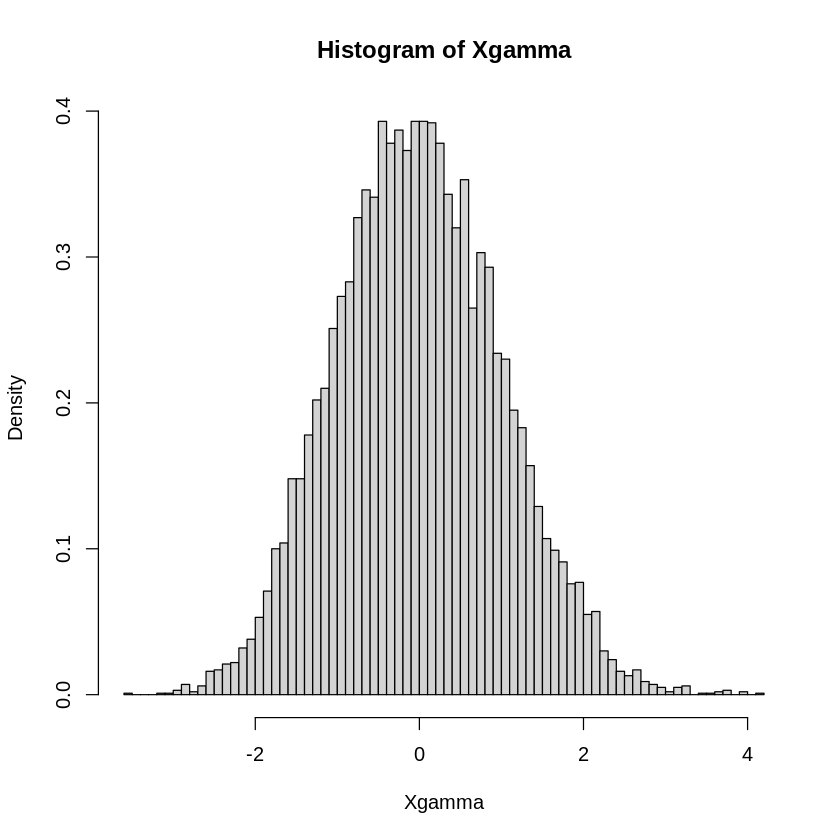

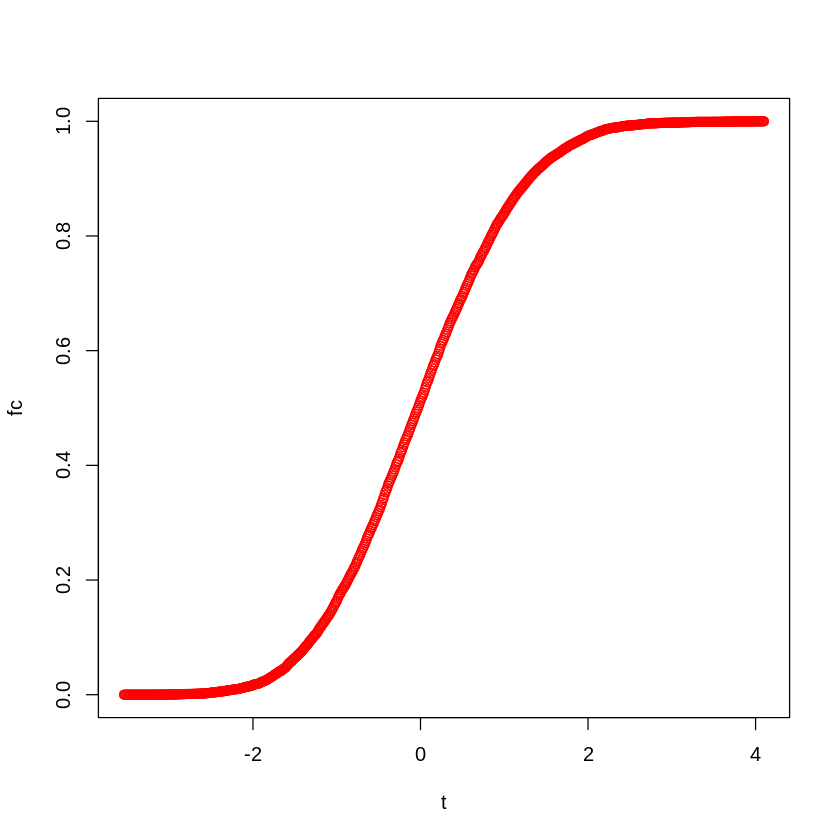

In [8]:
Xgamma <- Agamma(250)

t <- seq(min(Xgamma), max(Xgamma), 0.01)
hist(Xgamma, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=Xgamma)
plot(t, fc, col = 'red')

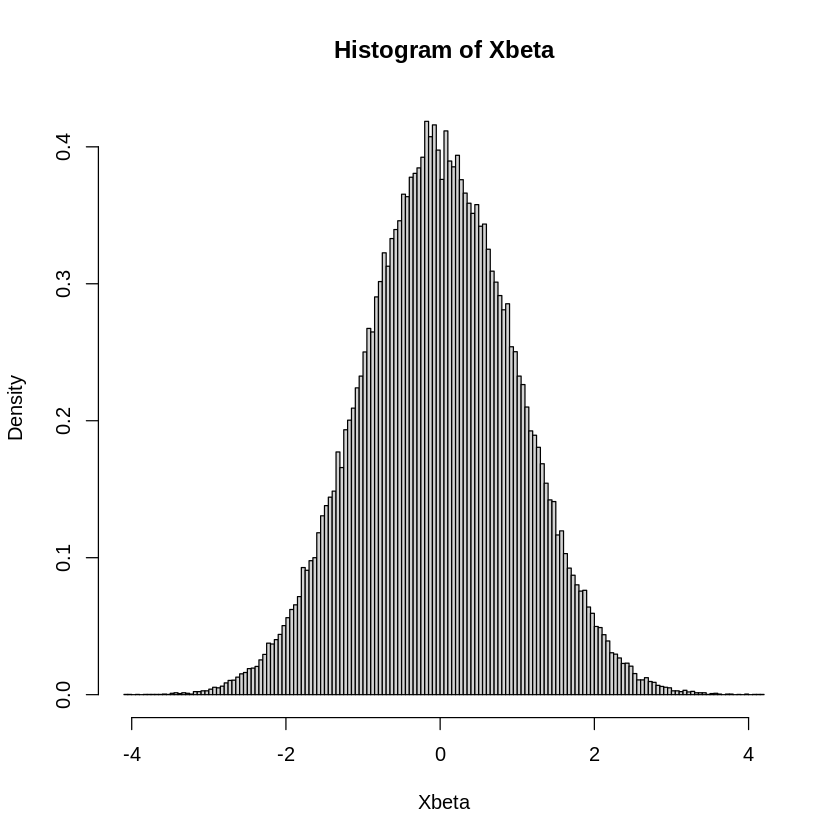

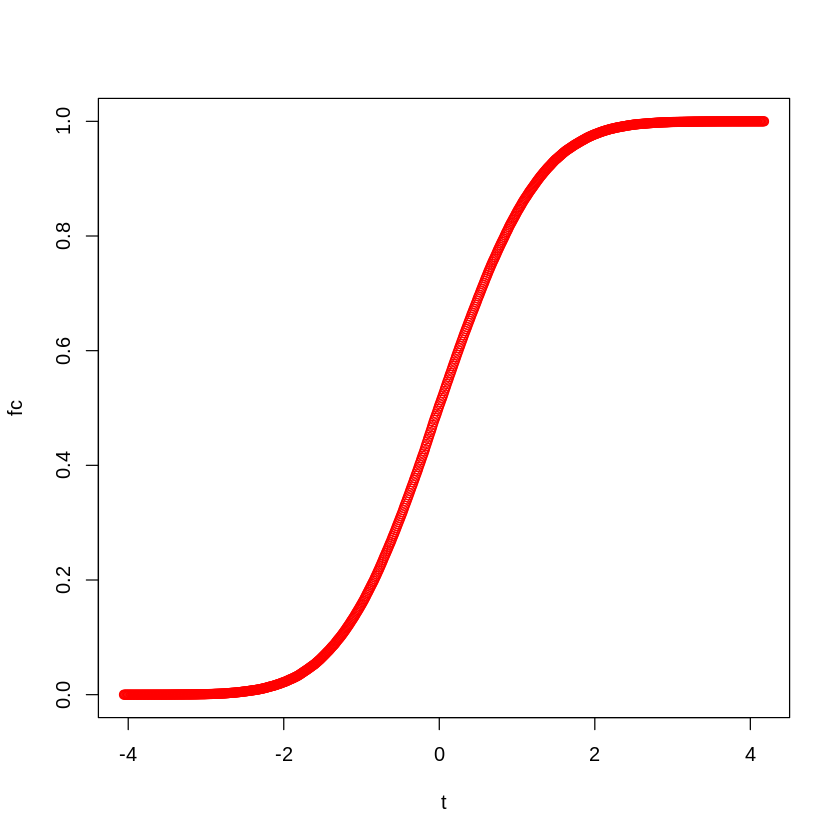

In [9]:
Xbeta <- Abeta(250)

t <- seq(min(Xbeta), max(Xbeta), 0.01)
hist(Xbeta, freq = F, breaks = 'FD')

fc <- sapply(t, CZ, v=Xbeta)
plot(t, fc, col = 'red')

In [10]:
#3
# optimize(functia, interval = c(a, b), maximum = T)

difBin <- function(x){
  return(abs(fixCZ(Xbin)(x) - pnorm(x)))
}

difGeom <- function(x){
  return(abs(fixCZ(Xgeom)(x) - pnorm(x)))
}

difPois <- function(x){
  return(abs(fixCZ(Xpois)(x) - pnorm(x)))
}

difUnifD <- function(x){
  return(abs(fixCZ(XunifD)(x) - pnorm(x)))
}

difUnif <- function(x){
  return(abs(fixCZ(Xunif)(x) - pnorm(x)))
}

difExp <- function(x){
  return(abs(fixCZ(Xexp)(x) - pnorm(x)))
}

difGamma <- function(x){
  return(abs(fixCZ(Xgamma)(x) - pnorm(x)))
}

difBeta <- function(x){
  return(abs(fixCZ(Xbeta)(x) - pnorm(x)))
}

print(optimize(difBin, c(min(Xbin), max(Xbin)), maximum = T)$objective)
print(optimize(difGeom, c(min(Xgeom), max(Xgeom)), maximum = T)$objective)
print(optimize(difPois, c(min(Xpois), max(Xpois)), maximum = T)$objective)
print(optimize(difUnifD, c(min(XunifD), max(XunifD)), maximum = T)$objective)
print(optimize(difUnif, c(min(Xunif), max(Xunif)), maximum = T)$objective)
print(optimize(difExp, c(min(Xexp), max(Xexp)), maximum = T)$objective)
print(optimize(difGamma, c(min(Xgamma), max(Xgamma)), maximum = T)$objective)
print(optimize(difBeta, c(min(Xbeta), max(Xbeta)), maximum = T)$objective)


[1] 0.007601818
[1] 0.01805303
[1] 0.02450591
[1] 0.01228427
[1] 0.001902087
[1] 0.004811457
[1] 0.01167375
[1] 0.001382701


In [11]:
# 4)

media <- function(denum, ...){
  tmp <- unlist(list(...))
  if(denum == "binom"){
    stopifnot(length(tmp) == 2, tmp[1]>0, tmp[2]>0, (tmp[1]-floor(tmp[1]))==0, tmp[2]<=1)
    #print("n*p")
    return(tmp[1]*tmp[2])
  }
  if(denum == "geom"){
    stopifnot(length(tmp) == 1, tmp>0, tmp<1)
    #print("(1-p)/p")
    return((1-tmp)/tmp)
  }
  if(denum == "poisson" || denum == "pois"){
    stopifnot(length(tmp) == 1, tmp>0)
    #print("lambda")
    return(tmp)
  }
  if(denum == "unifD"){
    stopifnot(length(tmp) == 2, tmp[1]<tmp[2])
    #print("(a+b)/2")
    return(sum(tmp)/2)
  }
  if(denum == "unif"){
    stopifnot(length(tmp) == 2, tmp[1]<tmp[2])
    #print("(a+b)/2")
    return(sum(tmp)/2)
  }
  if(denum == "exp"){
    stopifnot(length(tmp) == 1, tmp>0)
    #print("1/lambda")
    return(1/tmp)
  }
  if(denum == "gamma"){
    stopifnot(length(tmp) == 2, tmp[1]>0, tmp[2]>0)
    #print("k*theta")
    return(tmp[1]*tmp[2])
  }
  if(denum == "beta"){
    stopifnot(length(tmp) == 2, tmp[1]>0, tmp[2]>0)
    #print("alpha/(alpha+beta)")
    return(tmp[1]/(sum(tmp)))
  }
  print("nu este o alegere valida")
  stopifnot(1==2)
}

varianta <- function(denum, ...){
  tmp <- unlist(list(...))
  if(denum == "binom"){
    stopifnot(length(tmp) == 2, tmp[1]>0, tmp[2]>0, (tmp[1]-floor(tmp[1]))==0, tmp[2]<=1)
    #print("n*p*(1-p)")
    return(tmp[1]*tmp[2]*(1-tmp[2]))
  }
  if(denum == "geom"){
    stopifnot(length(tmp) == 1, tmp>0, tmp<1)
    #print("(1-p)/p^2")
    return((1-tmp)/(tmp^2))
  }
  if(denum == "poisson" || denum == "pois"){
    stopifnot(length(tmp) == 1, tmp>0)
    #print("lambda")
    return(tmp)
  }
  if(denum == "unifD"){
    stopifnot(length(tmp) == 2, tmp[1]<tmp[2])
    b <- tmp[2]
    a <- tmp[1]
    #print("((b-a+1)^2-1)/12")
    return(((b-a+1)^2-1)/12)
  }
  if(denum == "unif"){
    stopifnot(length(tmp) == 2, tmp[1]<tmp[2])
    #print("(b-a)^2/12")
    return((tmp[2]-tmp[1])^2/12)
  }
  if(denum == "exp"){
    stopifnot(length(tmp) == 1, tmp>0)
    #print("1/lambda^2")
    return(1/tmp^2)
  }
  if(denum == "gamma"){
    stopifnot(length(tmp) == 2, tmp[1]>0, tmp[2]>0)
    #print("k*theta^2")
    return(tmp[1]*tmp[2]^2)
  }
  if(denum == "beta"){
    stopifnot(length(tmp) == 2, tmp[1]>0, tmp[2]>0)
    #print("a*b/((a+b)^2*(a+b+1)), a=alpha, b=beta")
    return(tmp[1]*tmp[2]/(sum(tmp)^2*(sum(tmp)+1)))
  }
  print("nu este o alegere valida")
  stopifnot(1==2)
}

In [12]:
media("geom",0.6)

[1] 0.6666667

In [13]:
#ex 5

acelE <- function(V, miu)
{
  return(mean((abs(V-miu))^3))
}

In [14]:
#ex 6

BE <- function(miu, sigma, met){
  BEN <- function(n){
    X <- met(n)
    E <- acelE(X, miu)
    return(0.4748*E/(sqrt(n)*sigma^3))
    #return(33*E/(4*sqrt(n)*sigma^3))
  }
  return(BEN)
}

DO_YOU_WANT_TO_RUN_THIS_CODE = 1
if(DO_YOU_WANT_TO_RUN_THIS_CODE == 1) #dureaza 1 minut acest bloc de cod
{
  N = c(30, 100, 1000)
  df <- data.frame (
    Berry_Essen_Margin = c("n = 30", "n = 100", "n = 1000"),
    Binomial = sapply(N, BE(media("binom",12, 0.5), sqrt(varianta("binom", 12, 0.5)), Abinom)),
    Geometric = sapply(N, BE(media("geom", 0.5), sqrt(varianta("geom", 0.5)), Ageom)),
    Poisson = sapply(N, BE(media("pois", 0.5), sqrt(varianta("pois", 0.5)), Apois)),
    UniformD = sapply(N, BE(media("unifD", -1, 2), sqrt(varianta("unifD", -1, 2)), AunifD)),
    Uniform = sapply(N, BE(media("unif", -1, 1), sqrt(varianta("unif", -1, 1)), Aunif)),
    Exponential = sapply(N, BE(media("exp", 0.5), sqrt(varianta("exp", 0.5)), Aexp)),
    Gamma = sapply(N, BE(media("gamma", 0.5, 1), sqrt(varianta("gamma", 0.5, 1)), Agamma)),
    Beta = sapply(N, BE(media("beta", 2, 3), sqrt(varianta("beta", 2, 3)), Abeta))
  )
}
df


Berry_Essen_Margin,Binomial,Geometric,Poisson,UniformD,Uniform,Exponential,Gamma,Beta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
n = 30,3.9043608,0.12084528,0.5202882,0.13696562,0.7102017,0.14787037,0.50853692,20.995115
n = 100,2.1386835,0.06773470,0.2896553,0.07547593,0.3863068,0.08188609,0.27876235,11.603016
n = 1000,0.6754621,0.02205921,0.0935781,0.02379297,0.1248880,0.02610427,0.09190007,3.711152


In [15]:
show(df)

  Berry_Essen_Margin  Binomial  Geometric   Poisson   UniformD   Uniform
1             n = 30 3.9043608 0.12084528 0.5202882 0.13696562 0.7102017
2            n = 100 2.1386835 0.06773470 0.2896553 0.07547593 0.3863068
3           n = 1000 0.6754621 0.02205921 0.0935781 0.02379297 0.1248880
  Exponential      Gamma      Beta
1  0.14787037 0.50853692 20.995115
2  0.08188609 0.27876235 11.603016
3  0.02610427 0.09190007  3.711152


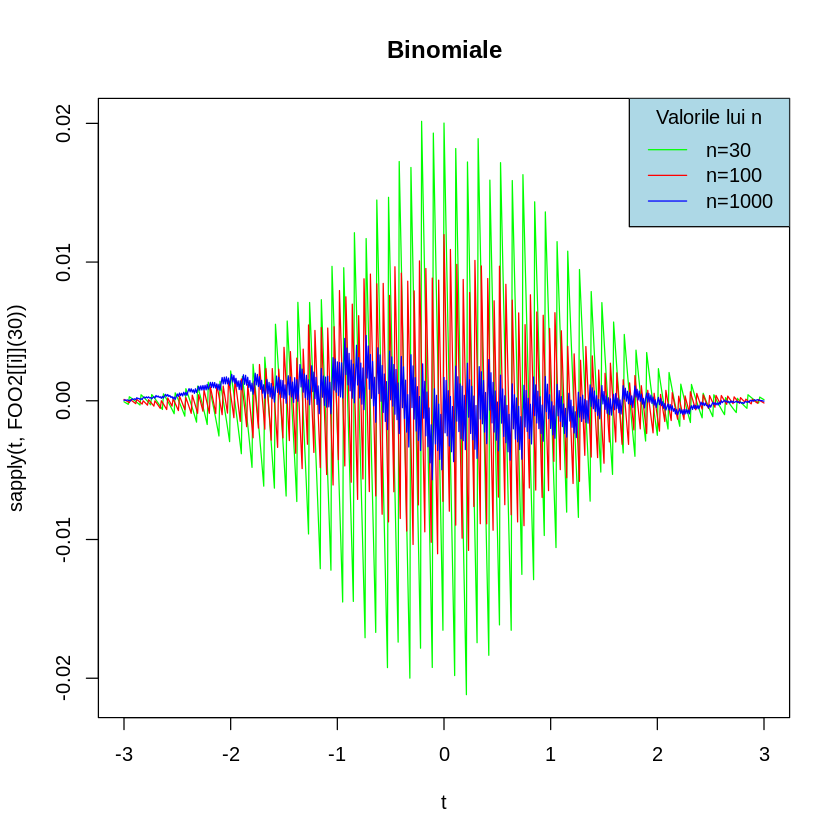

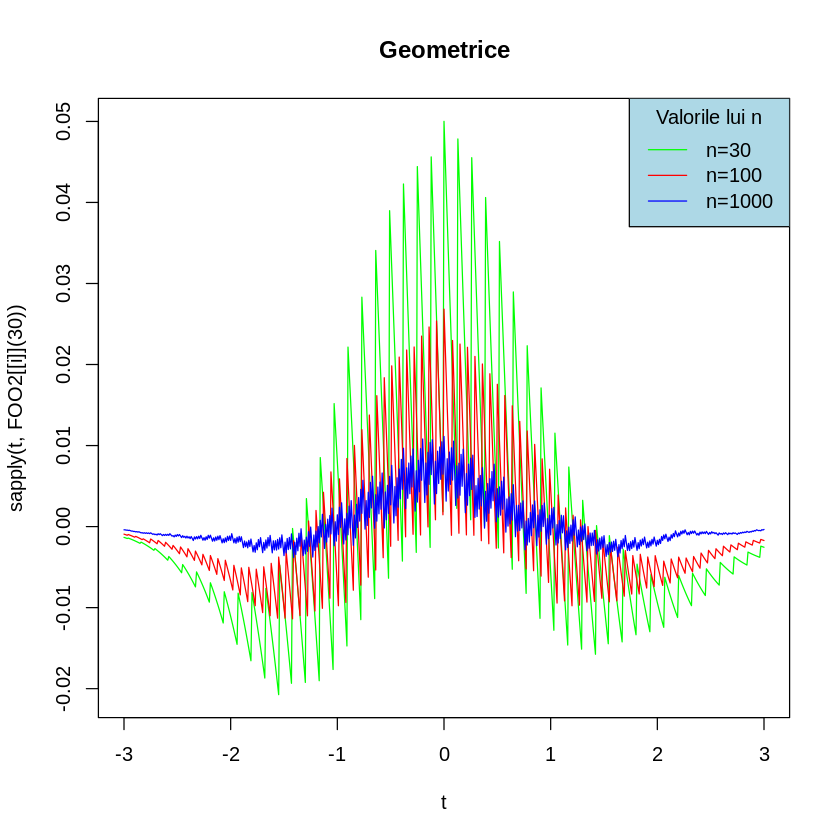

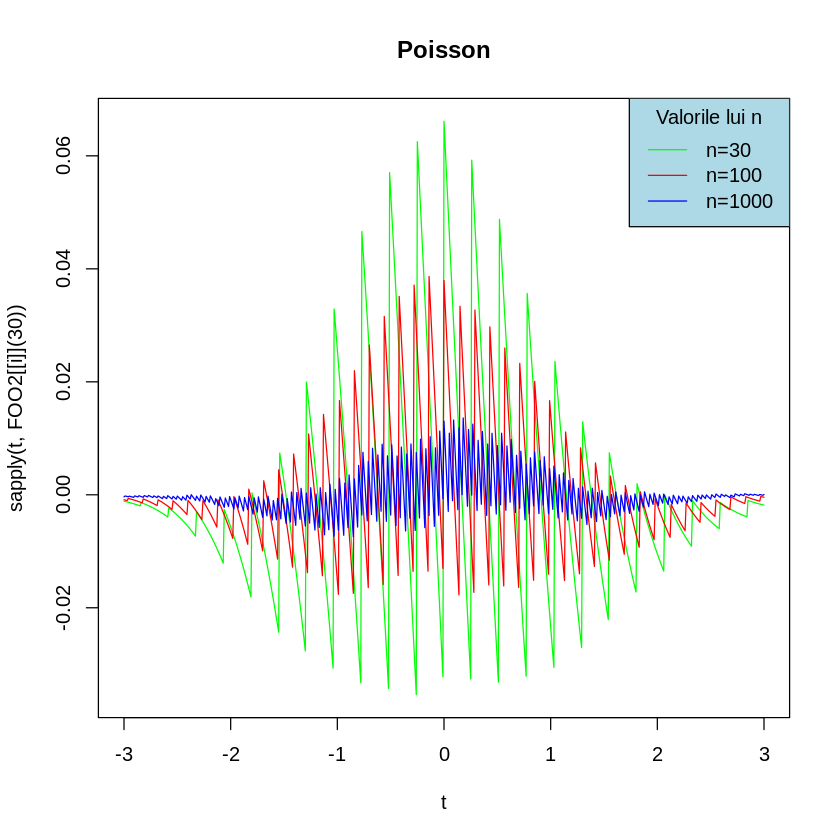

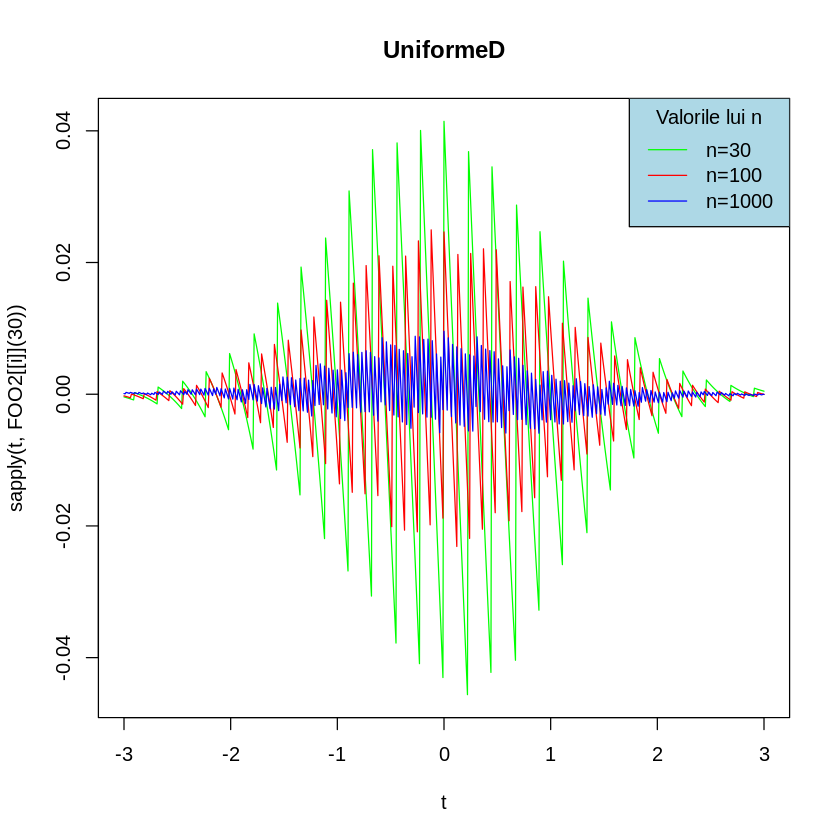

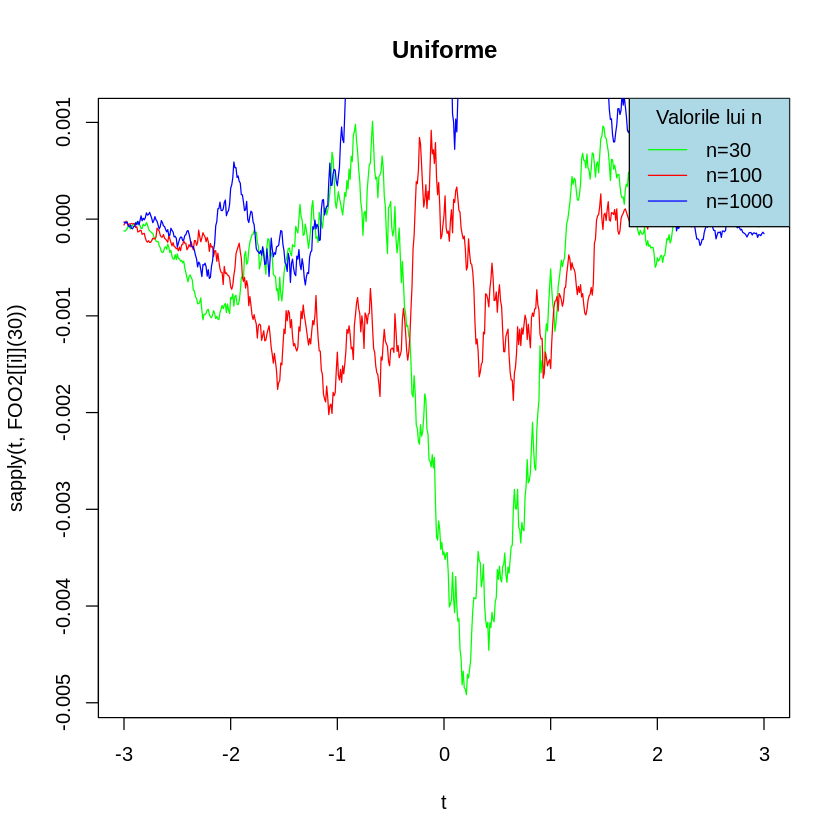

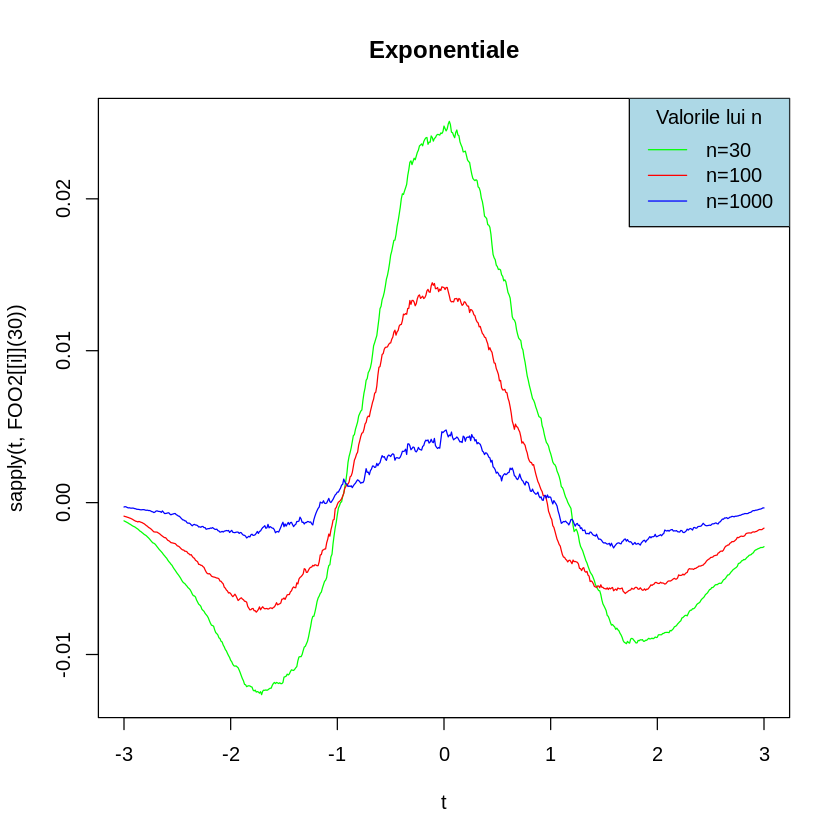

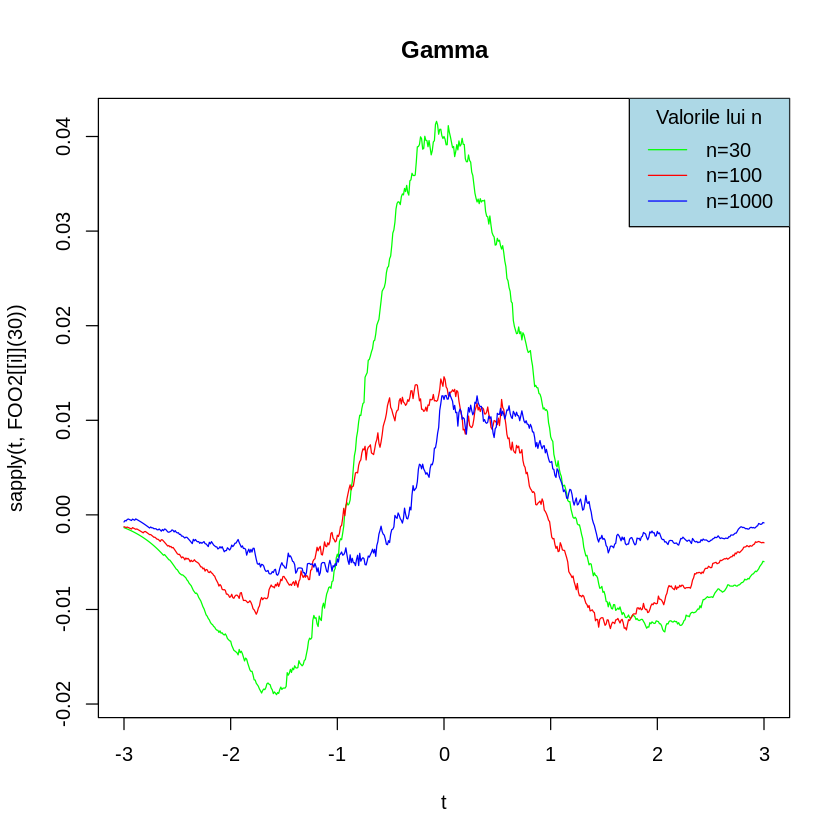

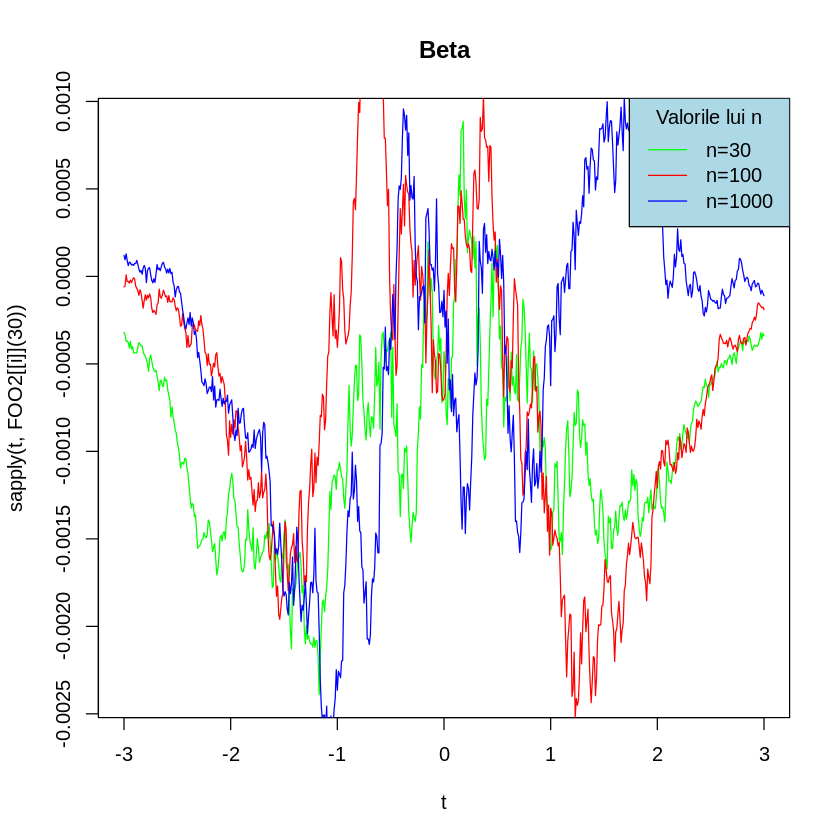

In [16]:
# Ex 7)

DIF <- function(met){
  DIFn <- function(n){
    V <- met(n)
    Z <- fixCZ(V)
    DIFx <- function(x){
      return(Z(x)-pnorm(x))
    }
    return(DIFx)
  }
  return(DIFn)
}

INDEx <- function(V){
  INDEn <- function(n){
    return(V[[n]])
  }
  return(INDEn)
}

nume <- c("Binomiale", "Geometrice", "Poisson", "UniformeD", "Uniforme", "Exponentiale", "Gamma", "Beta")
FOO <- c(Abinom, Ageom, Apois, AunifD, Aunif, Aexp, Agamma, Abeta)
FOO2 <- sapply(FOO, DIF)

DO_YOU_WANT_TO_RUN_THIS_CODE = 1
if(DO_YOU_WANT_TO_RUN_THIS_CODE == 1)
{
  t <- seq(-3, 3, 0.01)
  for(i in 1:8){
      plot(t, sapply(t, FOO2[[i]](30)), col = 'green', type = 'l', main = nume[i])
      lines(t, sapply(t, FOO2[[i]](100)), col = 'red')
      lines(t, sapply(t, FOO2[[i]](1000)), col = 'blue')
      legend("topright", legend=c("n=30", "n=100", "n=1000"), col = c("green", "red", "blue"), title = "Valorile lui n", bg = 'lightblue', lty = c(1, 1, 1))
  }
}

-----------------------------------------------------------------------------
END_OF_EX_1


[1] "a)"
M =  1.853246

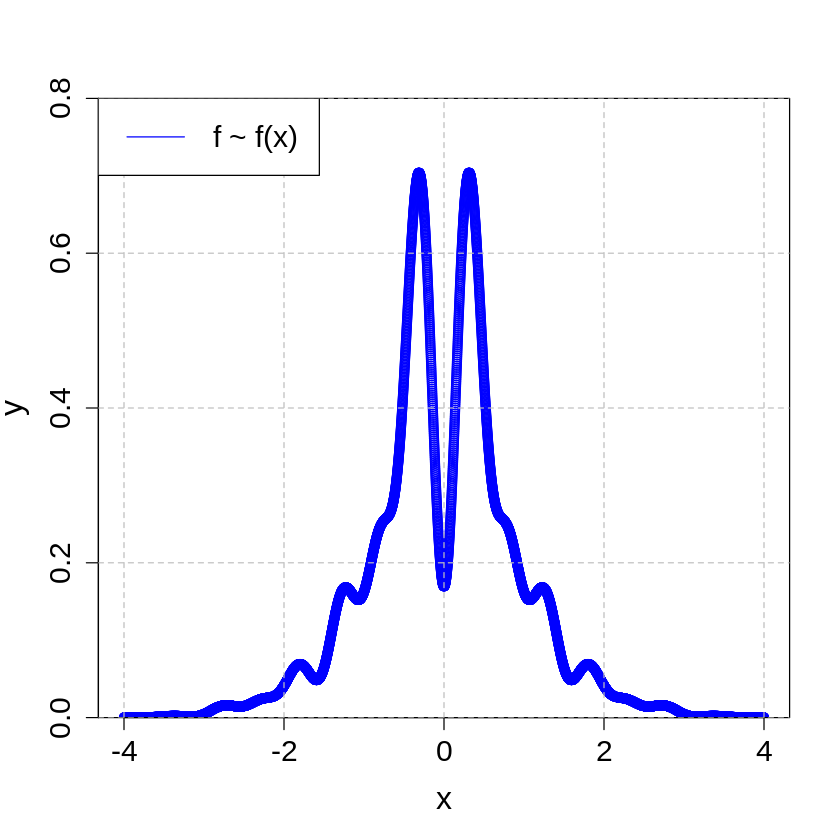

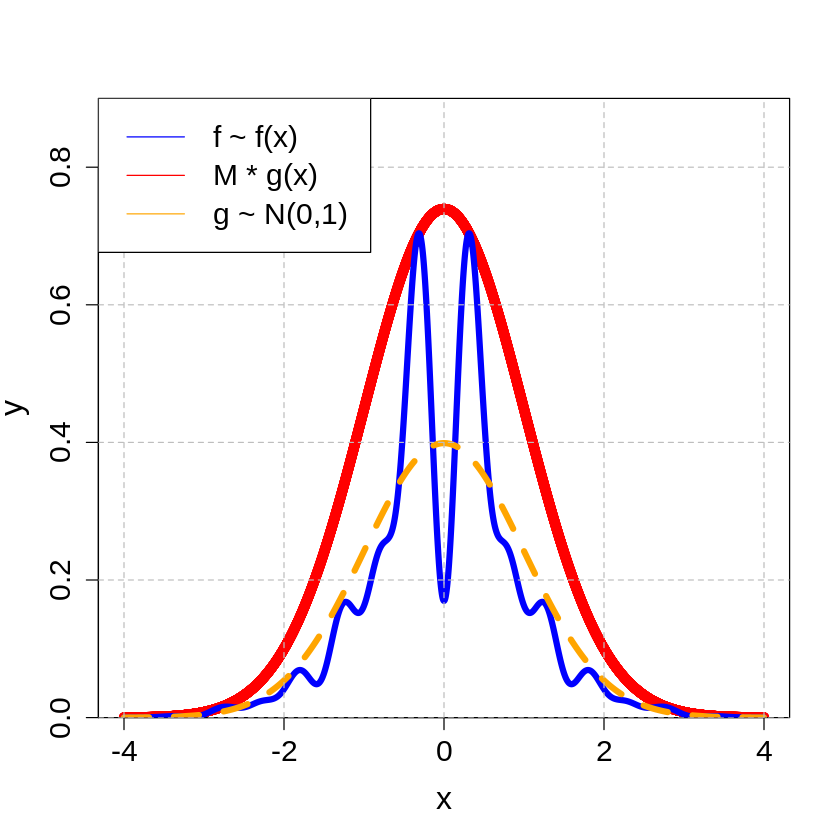

In [17]:
# Ex. 2 - rezolvat prin varianta naturala

# a)  - Considerăm această funcție pe intervalul (-4, 4). Am ales acest interval deoarece f e aproape 0 de la 4 incolo
#     - O transformăm într-o densitate de probabilitate (i.e. inmultim cu 0 constantă astfel încât aria integralei pe domeniul ales să fie = 1)

print('a)')

f <- function(x)
{
    return(exp(-(x^2)/2)*(sin(6*x)^2+3*(cos(x)^2)*(sin(4*x)^2)+1))
}

c = integrate(f, lower = -Inf, upper = Inf)[[1]]

f_p <- function(x)
{
    return(f(x)/c)
}

t <- seq(-4, 4, 0.001)
plot(t, f_p(t), col='blue', lwd=1, xlab='x', ylab='y', cex.axis=1.5, cex.lab=1.6, ylim=c(0,0.8), yaxs="i")
grid(nx = NULL, ny = NULL,
     lty = 2,      # Grid line type
     col = "gray", # Grid line color
     lwd = 1)

legend("topleft", legend=c("f ~ f(x)"),
       col=c("blue"), lty=1, cex=1.5)

g <- function(x)
{
    return((exp((-x^2)/2)/(sqrt(2*pi))))
}

f_max_abs = optimize(f_p, interval=c(0,1), maximum=T)[[1]]

M = (f_p(f_max_abs))/g(f_max_abs)
cat('M = ', M)

plot(t, M*g(t), col='red', lwd=1, xlab='x', ylab='y', cex.axis=1.5, cex.lab=1.6, ylim=c(0,0.9), yaxs="i")
lines(t, f_p(t), col='blue', lwd=5)
lines(t, g(t), col='orange', lwd=5, lty=2)
grid(nx = NULL, ny = NULL,
     lty = 2,      # Grid line type
     col = "gray", # Grid line color
     lwd = 1)

legend("topleft", legend=c("f ~ f(x)", 'M * g(x)', 'g ~ N(0,1)'),
       col=c("blue", 'red', 'orange'), lty=1, cex=1.5)

[1] "b)"


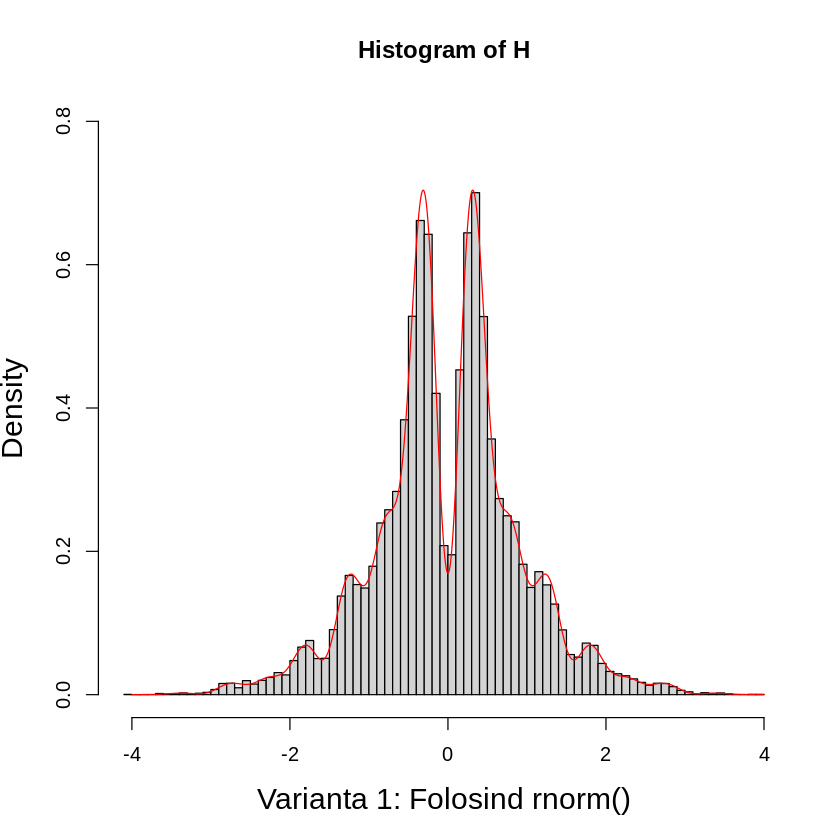

In [18]:
# b) - varianta 1: luam observatii din normala ~ N(0,1) folosind functia rnorm()

print('b)')

H <- replicate(2.5*10^4,
  {
    while(T)
    {
      x <- rnorm(1, 0, 1)
      w <- runif(1)
      if (M*g(x)*w <= f_p(x))
        return(x)
    }
  }
)

hist(H, freq=F, breaks = 'Scott', ylim=c(0,0.8), xlab='Varianta 1: Folosind rnorm()', cex.lab=1.5)
lines(t, f(t)/c, col='red')

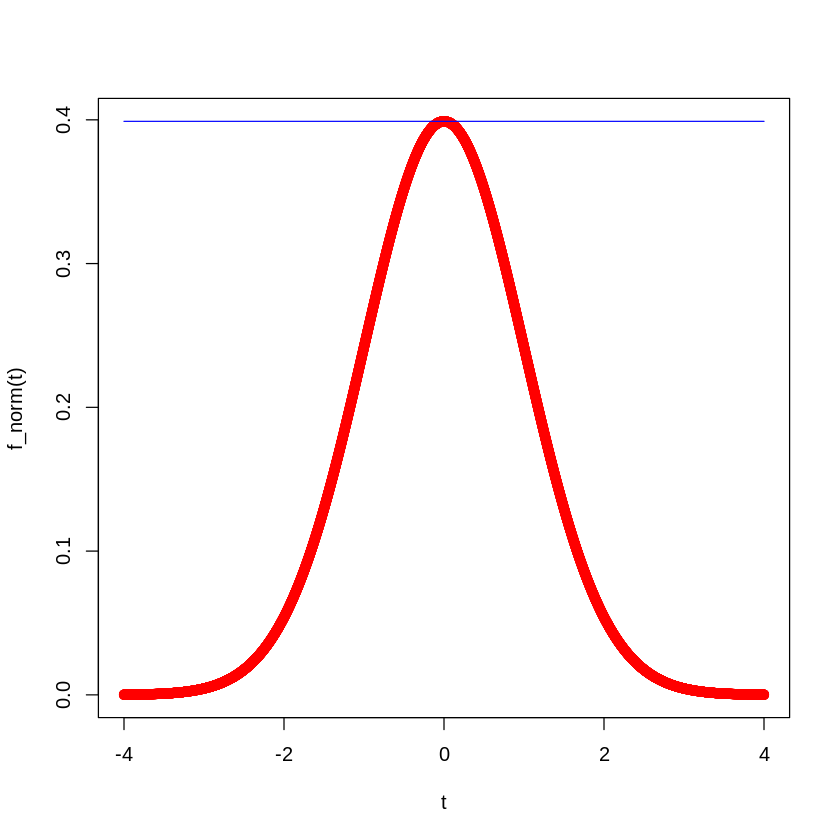

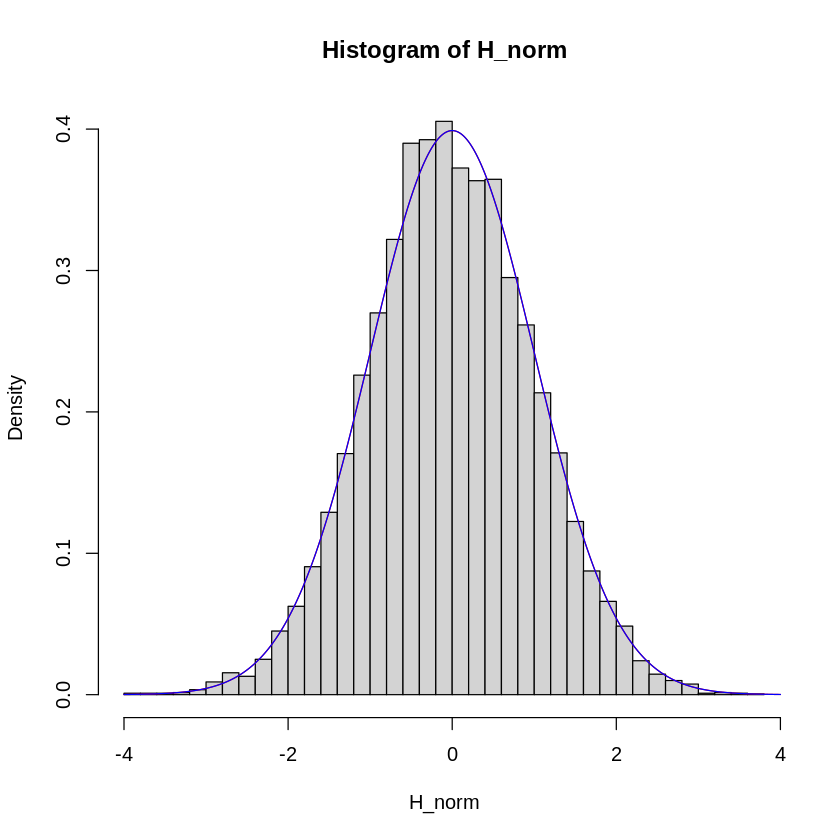

In [19]:
# b)  - varianta 2: luam observatii din normala ~ N(0,1) simuland-o prin metoda respingerii

# simularea normalei g ~ N(0,1) prin metoda respingerii
f_norm <- function(x)
{
    return((exp((-x^2)/2)/(sqrt(2*pi))))
}
t <- seq(-4, 4, 0.001)
plot(t, f_norm(t), col='red')

g_horiz <- function(x)
{
  return(ifelse(x<(-4), 0, ifelse(x<=4, 1/8, 0)))
}

c1 = f_norm(0)*8

lines(t, c1*g_horiz(t), col='blue')

H_norm <- replicate(10^4,
{
  while(T)
  {
    x <- runif(1, -4, 4)
    w <- runif(1)
    if(g_horiz(x)*c1*w<=f_norm(x))
      return(x)
  }
})


hist(H_norm, freq=F, breaks = 'Scott')
lines(t, f_norm(t), col='red')
lines(t, dnorm(t, 0, 1), col='blue')


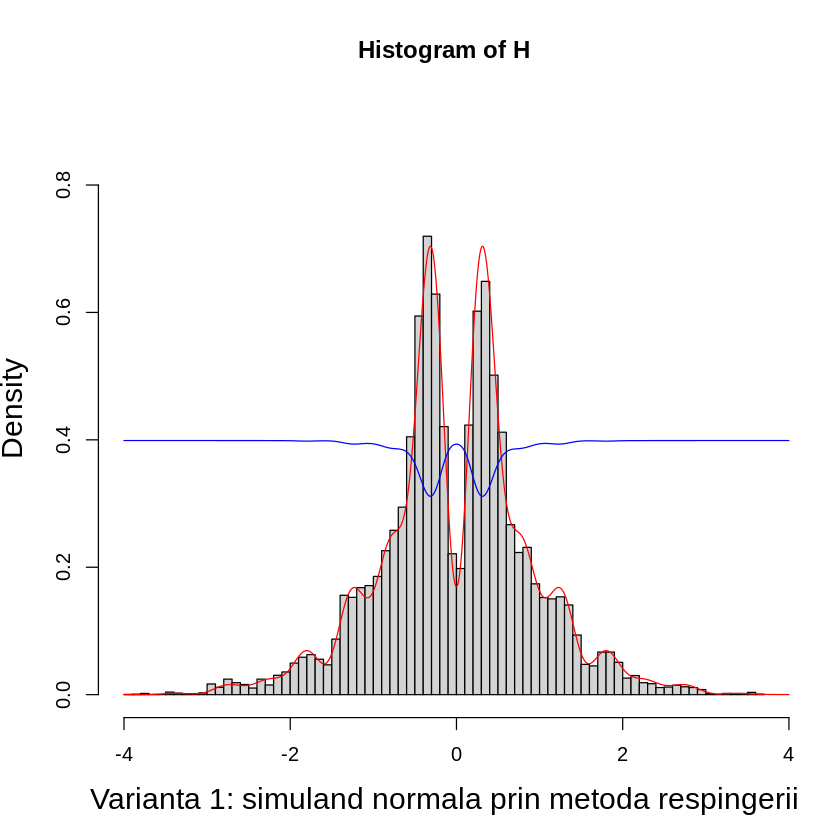

In [20]:
# Simularea lui f(x) prin metoda respingerii folosind un sample normal simulat prin metoda respingerii
# i.e. metoda respingerii(metoda respingerii(.))

H <- replicate(2.5*10^4,
  {
    while(T)
    {
      x = H_norm[sample(1:length(H_norm), 1)]
      w <- runif(1)
      if (M*g(x)*w <= f_p(x))
        return(x)
    }
  }
)

hist(H, freq=F, breaks = 'Scott', ylim=c(0,0.9), xlab='Varianta 1: simuland normala prin metoda respingerii', cex.lab=1.5)
lines(t, f_p(t), col='red')
lines(t, g(f_p(t)), col='blue')


[1] "a)"
M =  10.92366

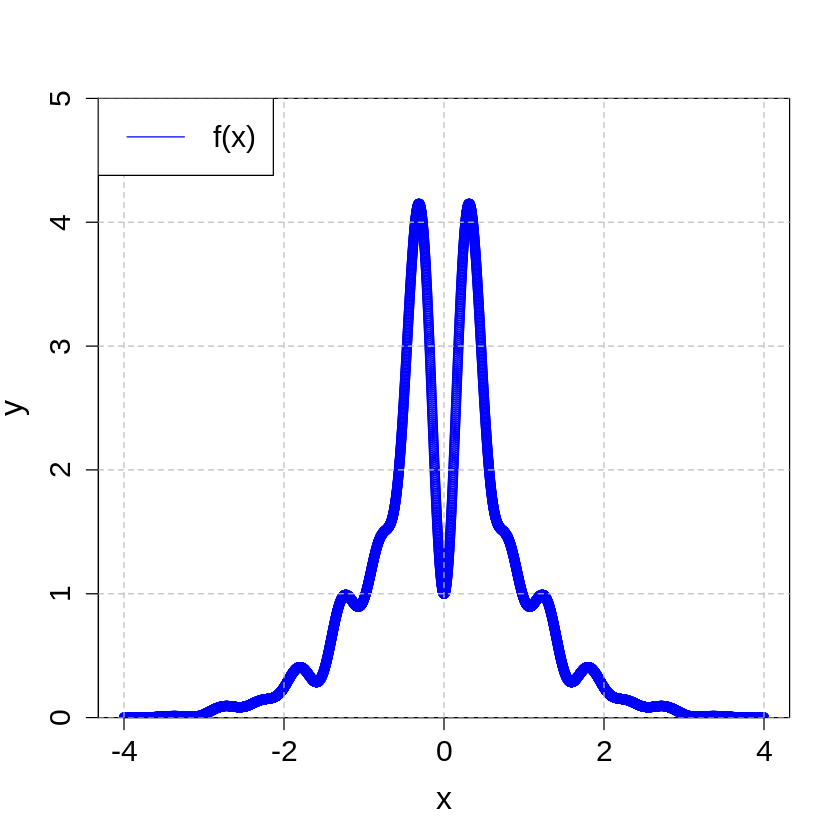

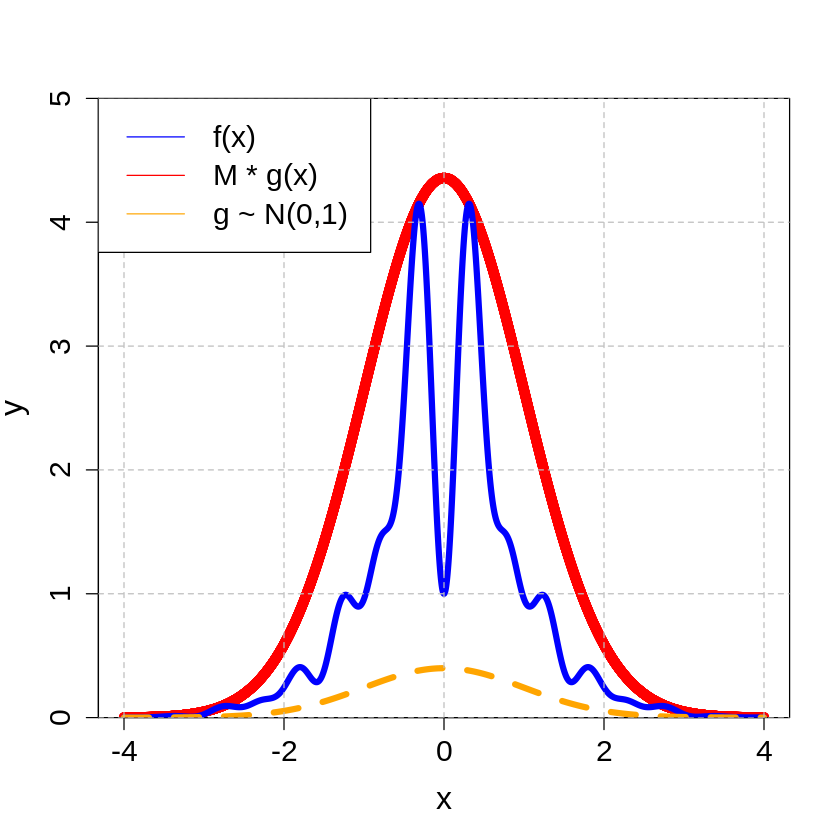

In [21]:
# Exercitiul 2 - rezolvat prin varianta intentionata

print('a)')

t <- seq(-4, 4, 0.001)
plot(t, f(t), col='blue', lwd=1, xlab='x', ylab='y', cex.axis=1.5, cex.lab=1.6, ylim=c(0,5), yaxs="i")
grid(nx = NULL, ny = NULL,
     lty = 2,      # Grid line type
     col = "gray", # Grid line color
     lwd = 1)

legend("topleft", legend=c("f(x)"),
       col=c("blue"), lty=1, cex=1.5)

g <- function(x)
{
    return((exp((-x^2)/2)/(sqrt(2*pi))))
}

f_max_abs = optimize(f, interval=c(0,1), maximum=T)[[1]]

M = (f(f_max_abs))/g(f_max_abs)
cat('M = ', M)

plot(t, M*g(t), col='red', lwd=1, xlab='x', ylab='y', cex.axis=1.5, cex.lab=1.6, ylim=c(0,5), yaxs="i")
lines(t, f(t), col='blue', lwd=5)
lines(t, g(t), col='orange', lwd=5, lty=2)
grid(nx = NULL, ny = NULL,
     lty = 2,      # Grid line type
     col = "gray", # Grid line color
     lwd = 1)

legend("topleft", legend=c("f(x)", 'M * g(x)', 'g ~ N(0,1)'),
       col=c("blue", 'red', 'orange'), lty=1, cex=1.5)

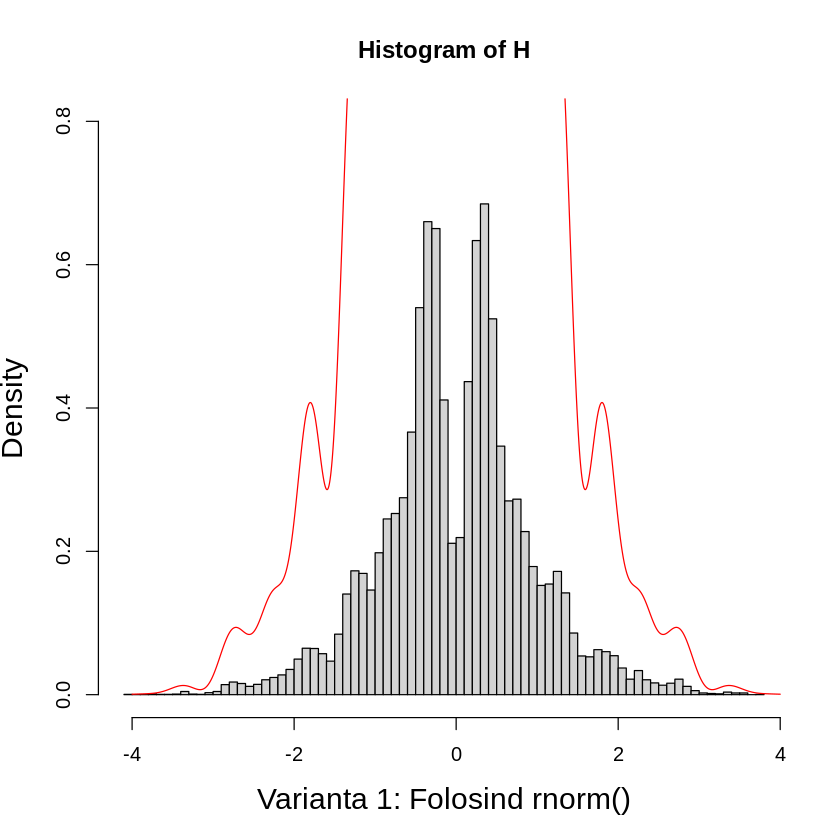


Aflarea constantei de normalizare folosind rata de acceptare din metoda respingerii, C3 =  0.1681744
Aflarea constantei de normalizare folosind metoda respingerii si facand media pe vectorul histogramei si eliminand valorile foarte mici, C2 =  0.1712276
Aflarea constantei de normalizare folosind metoda respingerii si luand raportul dintre max(f) si max(hist(f)), C =  0.1686907
Aflarea constantei de normalizare calculand integrala lui f(x), c =  0.1696543
Observam că C2 si C3 sunt aproximari mai bune a lui c

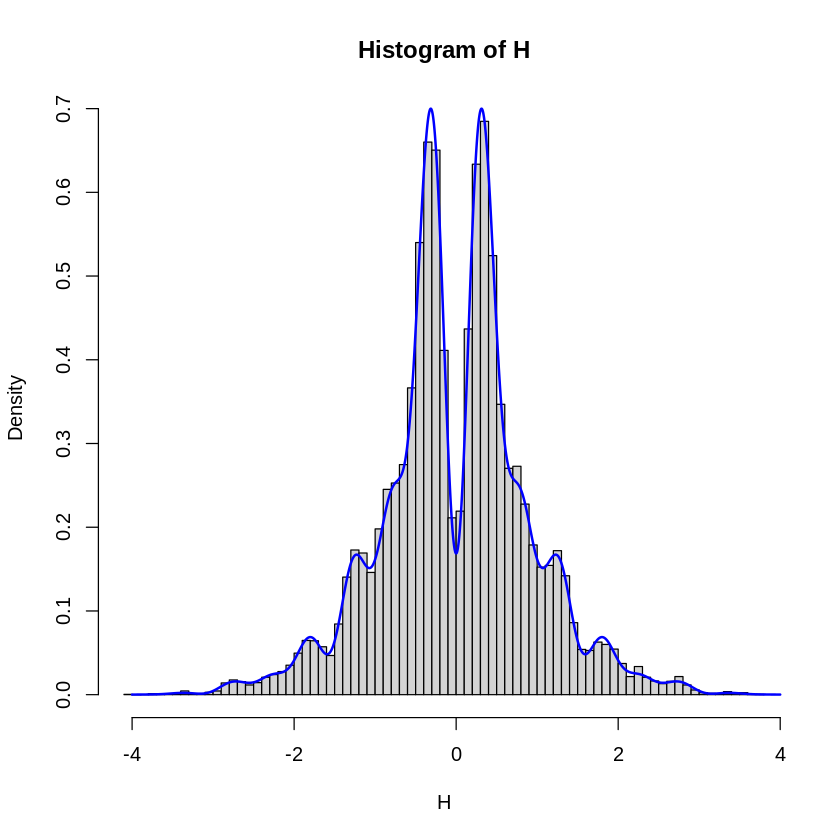

In [22]:
k<<-0
nr <- 2.5*10^4
H <- replicate(nr,
  {

    while(T)
    {

      x <- rnorm(1, 0, 1)
      w <- runif(1)
      if (M*g(x)*w <= f(x)){
        return(x)
      }
      k <<- k+1
    }

  }
)

rata_acceptare = nr/(nr+k)
C3 = M*rata_acceptare



hist(H, freq=F, breaks = 'Scott', ylim=c(0,0.8), xlab='Varianta 1: Folosind rnorm()', cex.lab=1.5)
lines(t, f(t), col='red')

list_H <- hist(H, breaks='Scott', freq=F)

#list_H
max_H = max(list_H$density)
i_max_H = list_H$mids[[which(list_H$density == max_H)]]
C = f(i_max_H)/max_H
lines(t, f(t)/C, col='blue', lwd=2)


C2 = f(list_H$mids[which(list_H$density > 0.15)])/list_H$density[which(list_H$density > 0.15)]

cat('\nAflarea constantei de normalizare folosind rata de acceptare din metoda respingerii, C3 = ', 1/C3)
cat('\nAflarea constantei de normalizare folosind metoda respingerii si facand media pe vectorul histogramei si eliminand valorile foarte mici, C2 = ',1/mean(C2))

cat('\nAflarea constantei de normalizare folosind metoda respingerii si luand raportul dintre max(f) si max(hist(f)), C = ', 1/C)
cat('\nAflarea constantei de normalizare calculand integrala lui f(x), c = ', 1/c)

cat('\nObservam că C2 si C3 sunt aproximari mai bune a lui c')

-----------------------------------------------------------------------------
END_OF_EX_2

In [ ]:
# Ex. 3 - !! Atenție !!
# Codul de la ex. 3 nu poate rula complet în colab deoarece nu poate rula libraria tkinter necesara pentru a folosi functii din libraria ConvergenceConcepts
# Puteti vizualiza screenshot-uri din rularile codului in RStudio

library(ConvergenceConcepts)

# 1)
Beta <- function(n){
  return(rbeta(n,1/(1:n),1/(1:n))) #am modificat aici
}
check.convergence(nmax=1000, M=500, genXn=Beta, mode="L",
                  densfunc=function(x){dbinom(x,1,1/2)},
                  probfunc=function(x){pbinom(x,1,1/2)},
                  tinf=0, tsup=1)

#Pentru 1/n si 1/n functia converge

Ex. 3.1a Observam că, incetul cu incetul, functia noastra converge in distributie.

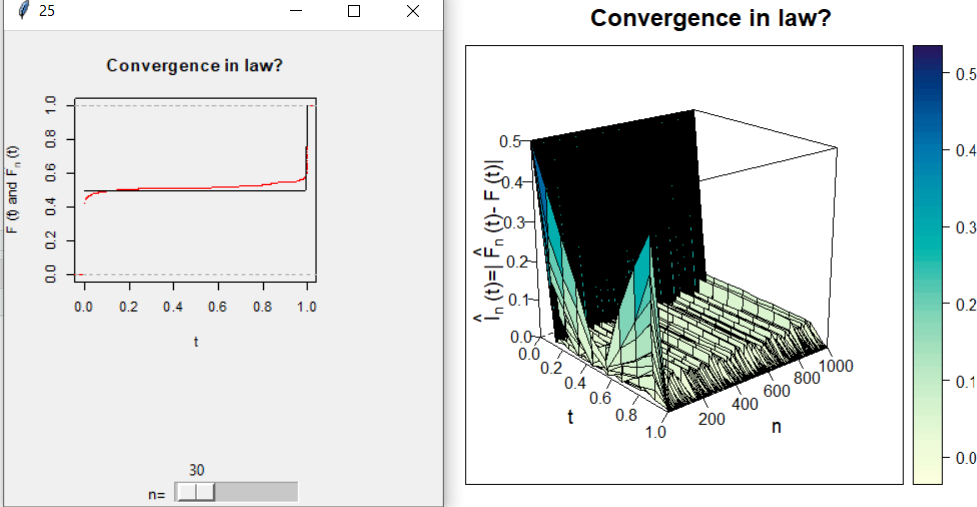

In [ ]:
#Exemple pentru a,b > 0
#a != b
Beta2 <- function(n){
  return(rbeta(n,15/(1:n),37/(1:n))) #am modificat aici
}
check.convergence(nmax=10^3, M=500, genXn=Beta2, mode="L",
                  densfunc=function(x){dbinom(x,1,1/2)},
                  probfunc=function(x){pbinom(x,1,1/2)},
                  tinf=0, tsup=1)

#a = b
Beta3 <- function(n){
  return(rbeta(n, 100/(1:n),100/(1:n))) #am modificat aici
}
check.convergence(nmax=10^3, M=500, genXn=Beta3, mode="L",
                  densfunc=function(x){dbinom(x,1,1/2)},
                  probfunc=function(x){pbinom(x,1,1/2)},
                  tinf=0, tsup=1)

#Pentru a,b >100 a,b != 1, functia nu mai
#[alec] sigur? :>

Ex. 3.1b Cu a, b > 0, functia noastra tot are un comportament cuminte si converge in cele din urma

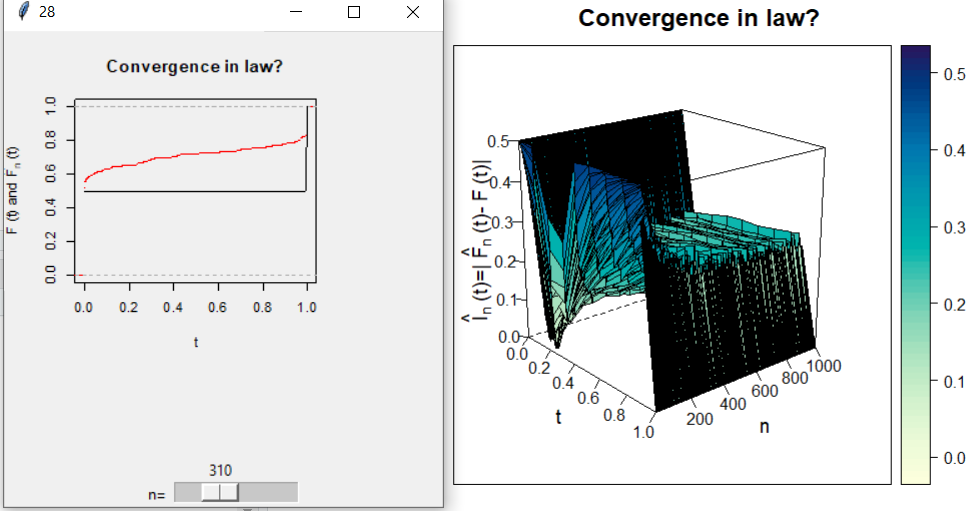

In [ ]:
# 2)


functionXn <- function(n){ #am modificat aici
  return(floor(runif(n, 1, (1:n)+1))/(1:n))
}

check.convergence(nmax = 100, M = 500, genXn = functionXn, mode = "L",
                  densfunc = function(x){dunif(x,0,1)},
                  probfunc = function(x){punif(x,0,1)},
                  tinf = 0, tsup = 1)

#[alec] acum tinde frumos, depinzand de n, spre dreapta y=x
#Converge, ca se suprapun valorile

Ex. 3.2 Observam cum variabila converge in distributie catre X ~ U(0,1) care este reprezentata in graficul din stanga ca acea linia diagonala (y=x).

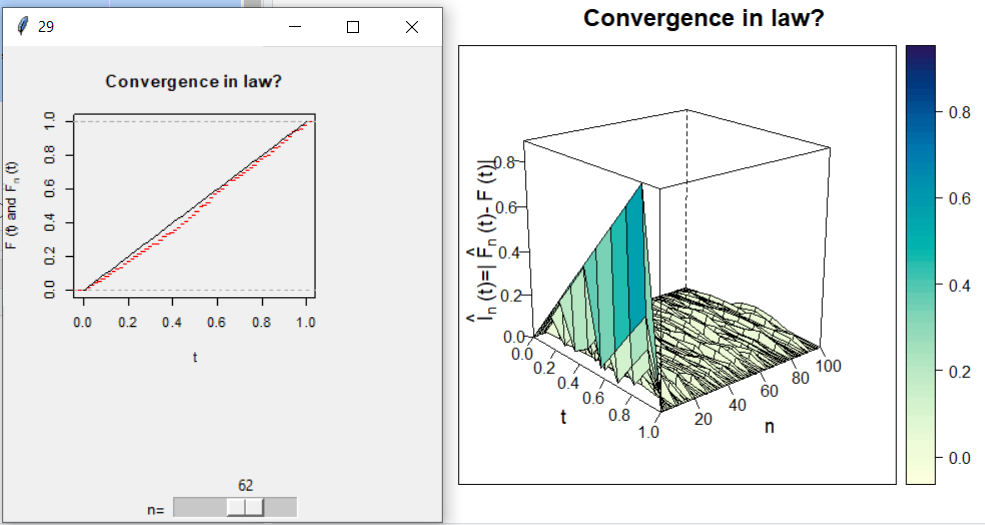

In [ ]:
check.convergence(nmax = 100, M = 500, genXn = functionXn, mode = "p")
#[alec] Si mie mi se pare ca nu converge dar nu stiu daca e mine
#Mi se pare ca nu converge, pentru ca majoritatea valorilor go off

Ex. 3.2b Aici nu se observa convergenta in probabilitate, desi ar trebui. Au fost întâmpinate dificultăți în a înțelege sintaxa funcției check.convergence și modul în care trebuie construită funcția generatoare in cazul in care vrem sa verificam convergenta in probabilitate a unei v.a. catre alta v.a.

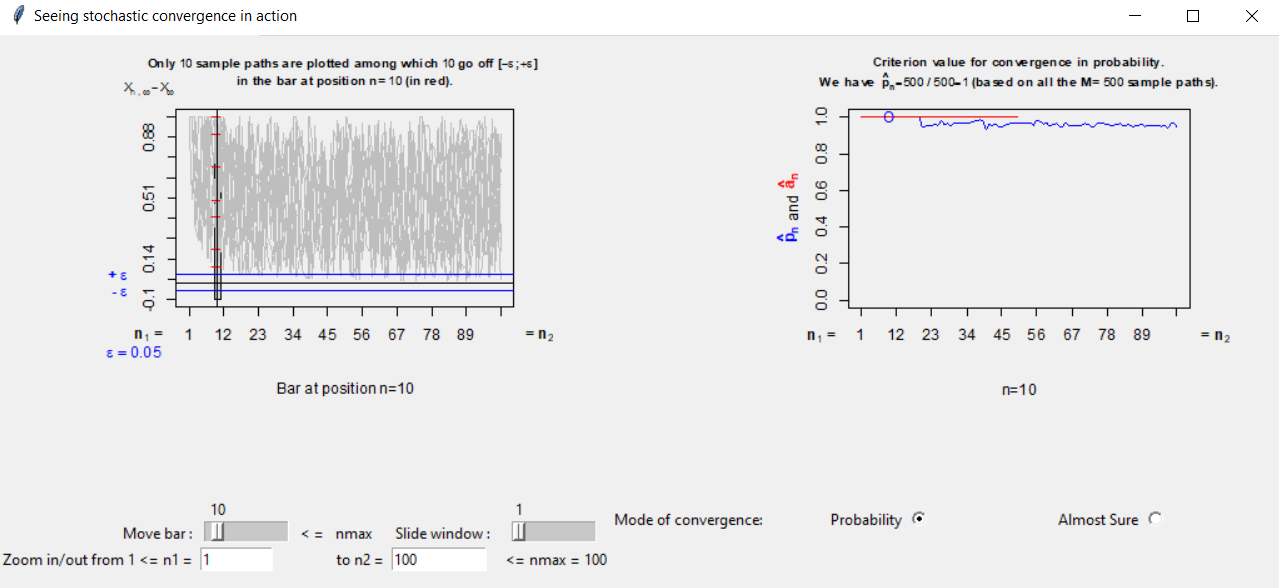

In [ ]:
#Am folosit inegalitatea Markov, E(Xn) -(p)-> E(X) => Xn -(p)-> X

functionEXn <- function(n){
  y <- vector()
  for(x in 1:n){
    y <- c(y, mean(sample((1:x)/x,n, replace=T)))
  }
  return(y-0.5)
}
# functionEXn(100)

check.convergence(nmax = 500, M = 100, functionEXn, mode = "p")

Ex. 3.2 Pentru a ilustra totusi convergenta in probabilitate vom folosi inegalitatea Markov care ne spune că dacă E[Xn] converge P la E[X], atunci Xn converge P la X. Astfel putem implementa in sintaxa deoarece E[X] cand X ~ (0,1) este = 0.5

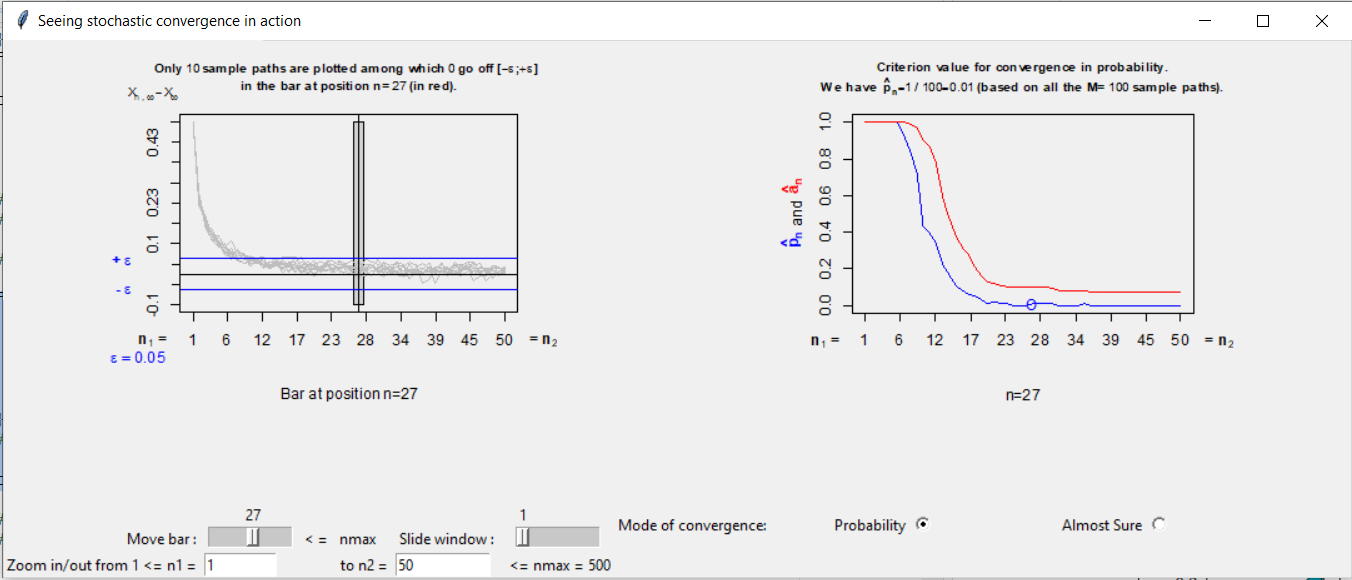

In [ ]:
# 3) - vom lua, pur întâmplător, cazul unei distributii uniforme ~ U(0,1) si arătăm că afirmația ține
m <- 0
M <- 1

funMin <- function(n){ #am modificat aici
  funMinAj <- function(x){
    return(min(runif(x))-m)
  }
  return(sapply(1:n, funMinAj))
}

funMax <- function(n){ #am modificat aici
  funMaxAj <- function(x){
    return(max(runif(x))-M)
  }
  return(sapply(1:n, funMaxAj))
}


check.convergence(nmax = 500, M = 100, genXn = funMin, mode="as")
check.convergence(nmax = 500, M = 100, genXn = funMax, mode="as")

Ex. 3.3 Vedem cum minimul si maximul extragerilor converg catre minimul si maximul teoretic cu cat crestem n. Prima imagine este pentru minim.

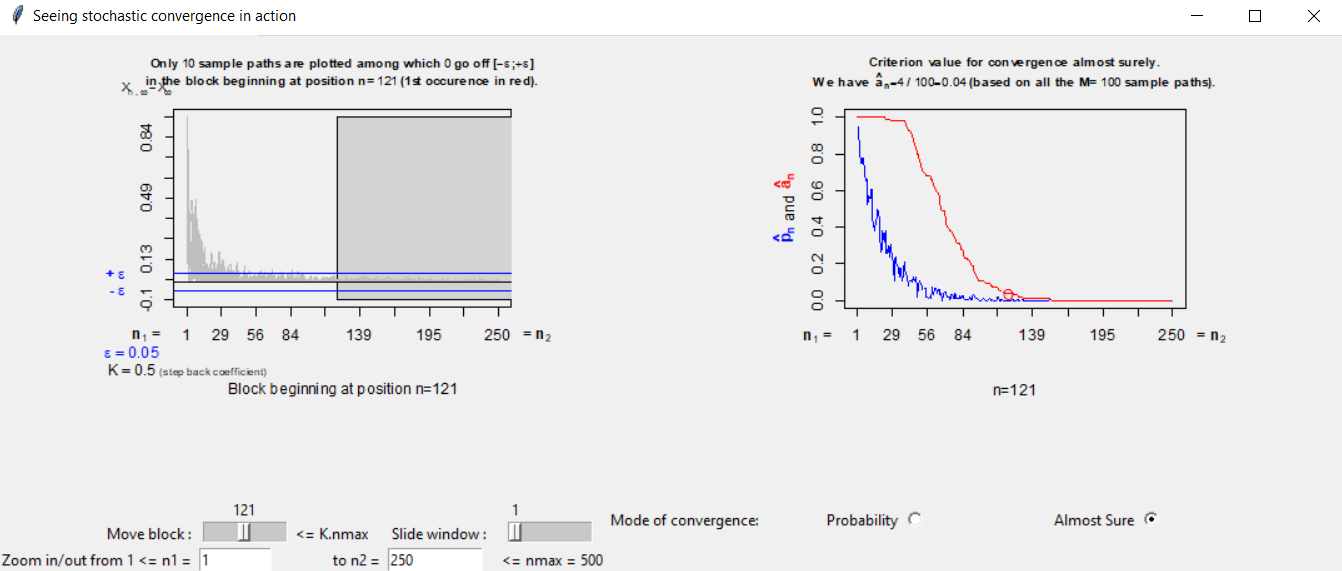

Ex. 3.3 Urmatoarea imagine este pentru maxim

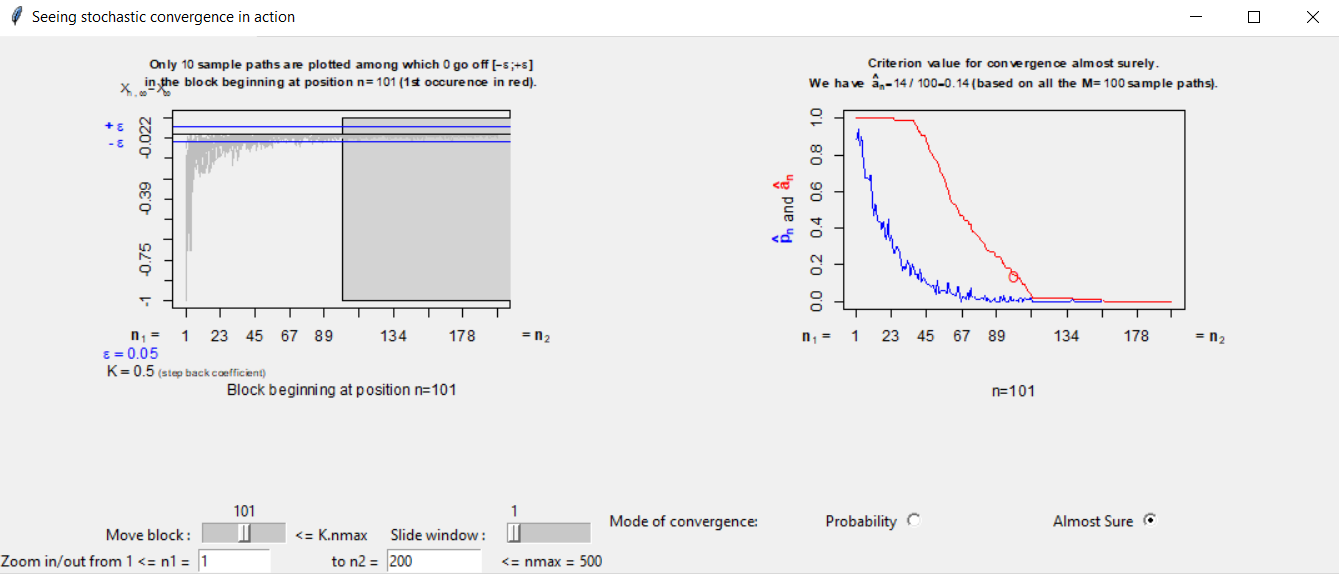

------------------------------------------------
END_OF_EX_3

In [1]:
# Ex.4

# ex.1a - probabilitatile teoretice

nr_bil_total = choose(49, 6)
prob = function(n){
  return(choose(6, n)*choose(43, 6-n)/nr_bil_total)
}

# a)
prob_a = sapply((3:6), prob)
prob_a

[1] 1.765040e-02 9.686197e-04 1.844990e-05 7.151124e-08

In [2]:
#ex1.a
#varianta cu replicate
set.seed(123)  # pt reproductibilitate

n <- 10^5  # nr simulari
castigator <- sample(1:49, 6)  # geneream combinatie castigatoare aleatoare

# functie care efectueaza o singura simulare
efectueaza_simulare <- function() {
  bilet <- sample(1:49, 6, replace = FALSE)  # generare bilet aleatoriu
  corecte <- length(intersect(bilet, castigator))  # cate nr am ghicit corect
  return(corecte)  # numarul de nr corecte
}

# functia efectueaza_simulare de n ori
rezultate <- replicate(n, efectueaza_simulare())

# prob pt fiecare categorie de castig
probabilitate_3 <- sum(rezultate == 3) / n
probabilitate_4 <- sum(rezultate == 4) / n
probabilitate_5 <- sum(rezultate == 5) / n
probabilitate_6 <- sum(rezultate == 6) / n

# afisare probabilitati
cat("Probabilitatea estimată de a câștiga la 3 numere corecte: ", sprintf("%.8e", probabilitate_3), "\n")
cat("Probabilitatea estimată de a câștiga la 4 numere corecte: ", sprintf("%.8e", probabilitate_4), "\n")
cat("Probabilitatea estimată de a câștiga la 5 numere corecte: ", sprintf("%.8e", probabilitate_5), "\n")
cat("Probabilitatea estimată de a câștiga la 6 numere corecte: ", sprintf("%.8e", probabilitate_6), "\n")

Probabilitatea estimată de a câștiga la 3 numere corecte:  1.84500000e-02 
Probabilitatea estimată de a câștiga la 4 numere corecte:  1.06000000e-03 
Probabilitatea estimată de a câștiga la 5 numere corecte:  2.00000000e-05 
Probabilitatea estimată de a câștiga la 6 numere corecte:  0.00000000e+00 


In [4]:
#varianta cu for
set.seed(123)  # pt reproductibilitate

n <- 10^6  # nr simulari
castigator <- sample(1:49, 6)  # geneream combinatie castigatoare aleatoare

# contor pt fiecare categorie de castig
count_3 <- count_4 <- count_5 <- count_6 <- 0

for (i in 1:n) {
  bilet <- sample(1:49, 6, replace = FALSE)  # generam un bilet aleatoriu
  corecte <- length(intersect(bilet, castigator))  # cate numere am ghicit corect

  if (corecte == 3) count_3 <- count_3 + 1
  if (corecte == 4) count_4 <- count_4 + 1
  if (corecte == 5) count_5 <- count_5 + 1
  if (corecte == 6) count_6 <- count_6 + 1
}

cat("Probabilitatea estimată de a câștiga la 3 numere corecte: ", count_3 / n, "\n")
cat("Probabilitatea estimată de a câștiga la 4 numere corecte: ", count_4 / n, "\n")
cat("Probabilitatea estimată de a câștiga la 5 numere corecte: ", count_5 / n, "\n")
cat("Probabilitatea estimată de a câștiga la 6 numere corecte: ", count_6 / n, "\n")

Probabilitatea estimată de a câștiga la 3 numere corecte:  0.01778 
Probabilitatea estimată de a câștiga la 4 numere corecte:  0.001024 
Probabilitatea estimată de a câștiga la 5 numere corecte:  2.4e-05 
Probabilitatea estimată de a câștiga la 6 numere corecte:  0 


In [6]:
#ex1.b
set.seed(123)  # pt reproductibilitate

n <- 10^5  # nr bilete simulate
k <- 10    # nr incercari (dat de mine)

# functie pt a verifica castigurile intr-o singura simulare de k incercari
verifica_castig <- function() {
  # simulez k incercari
  rezultate <- replicate(k, {
    bilet <- sample(1:49, 6, replace = FALSE)
    castigator <- sample(1:49, 6, replace = FALSE)
    sum(bilet %in% castigator)  # Nr de nr corecte pt fiecare incercare
  })

  # verific daca exista cel putin un castig pt fiecare cat
  c(any(rezultate == 3), any(rezultate == 4), any(rezultate == 5), any(rezultate == 6))
}

# fct de n ori cu sapply + sumam rezultatele
rezultate_finale <- t(sapply(seq_len(n), function(x) verifica_castig()))
sumar_rezultate <- colSums(rezultate_finale)

# probabilitatile pt fiecare categorie castig
probabilitati <- sumar_rezultate / n

cat("Probabilitatea estimată de a câștiga la 3 numere cel puțin o dată în", k, "încercări:", probabilitati[1], "\n")
cat("Probabilitatea estimată de a câștiga la 4 numere cel puțin o dată în", k, "încercări:", probabilitati[2], "\n")
cat("Probabilitatea estimată de a câștiga la 5 numere cel puțin o dată în", k, "încercări:", probabilitati[3], "\n")
cat("Probabilitatea estimată de a câștiga la 6 numere cel puțin o dată în", k, "încercări:", probabilitati[4], "\n")

Probabilitatea estimată de a câștiga la 3 numere cel puțin o dată în 10 încercări: 0.16366 
Probabilitatea estimată de a câștiga la 4 numere cel puțin o dată în 10 încercări: 0.00905 
Probabilitatea estimată de a câștiga la 5 numere cel puțin o dată în 10 încercări: 0.00024 
Probabilitatea estimată de a câștiga la 6 numere cel puțin o dată în 10 încercări: 0 


In [7]:
#ex1.c
set.seed(123)  # pt reproductibilitate

n <- 10^5  # nr simulari
k <- 10    # nr incercari
r <- 2     # nr dorit de castiguri

# simulez k incercari si returnez nr castiguri pt fiecare categorie
simuleaza_incercari <- function() {
  castiguri <- replicate(k, {
    bilet <- sample(1:49, 6, replace = FALSE)
    castigator <- sample(1:49, 6, replace = FALSE)
    corecte <- length(intersect(bilet, castigator))
    return(corecte)
  })

  c(sum(castiguri == 3), sum(castiguri == 4), sum(castiguri == 5), sum(castiguri == 6))
}

# simuleaza_incercari de n ori + calcul probabilitati
rezultate <- t(replicate(n, simuleaza_incercari()))
castiguri_exacte_r <- colSums(rezultate == r) / n

cat("Probabilitatea estimată de a câștiga cu 3 numere de exact", r, "ori în", k, "încercări:", castiguri_exacte_r[1], "\n")
cat("Probabilitatea estimată de a câștiga cu 4 numere de exact", r, "ori în", k, "încercări:", castiguri_exacte_r[2], "\n")
cat("Probabilitatea estimată de a câștiga cu 5 numere de exact", r, "ori în", k, "încercări:", castiguri_exacte_r[3], "\n")
cat("Probabilitatea estimată de a câștiga cu 6 numere de exact", r, "ori în", k, "încercări:", castiguri_exacte_r[4], "\n")

Probabilitatea estimată de a câștiga cu 3 numere de exact 2 ori în 10 încercări: 0.01275 
Probabilitatea estimată de a câștiga cu 4 numere de exact 2 ori în 10 încercări: 2e-05 
Probabilitatea estimată de a câștiga cu 5 numere de exact 2 ori în 10 încercări: 0 
Probabilitatea estimată de a câștiga cu 6 numere de exact 2 ori în 10 încercări: 0 


In [8]:
# cu for
set.seed(123)  # pt reproductibilitate

n <- 10^5  # nr bilete simulate
k <- 10    # nu incercari (dat de mine)
r <- 2     # nr dorit de castiguri (dat de mine)

# contoare pt evidenta castigurilor de exact r ori
exact_win_3 <- exact_win_4 <- exact_win_5 <- exact_win_6 <- 0

for (i in 1:n) {
  count_3 <- count_4 <- count_5 <- count_6 <- 0

  for (j in 1:k) {
    bilet <- sample(1:49, 6, replace = FALSE)
    castigator <- sample(1:49, 6, replace = FALSE)
    corecte <- length(intersect(bilet, castigator))

    # contorizare castiguri pt fiecare categorie
    if (corecte == 3) count_3 <- count_3 + 1
    if (corecte == 4) count_4 <- count_4 + 1
    if (corecte == 5) count_5 <- count_5 + 1
    if (corecte == 6) count_6 <- count_6 + 1
  }

  # verificam daca nr de castiguri corespunde cu r
  if (count_3 == r) exact_win_3 <- exact_win_3 + 1
  if (count_4 == r) exact_win_4 <- exact_win_4 + 1
  if (count_5 == r) exact_win_5 <- exact_win_5 + 1
  if (count_6 == r) exact_win_6 <- exact_win_6 + 1
}

prob_3 <- exact_win_3 / n
prob_4 <- exact_win_4 / n
prob_5 <- exact_win_5 / n
prob_6 <- exact_win_6 / n

cat("Probabilitatea estimată de a câștiga cu 3 numere de exact", r, "ori în", k, "încercări:", prob_3, "\n")
cat("Probabilitatea estimată de a câștiga cu 4 numere de exact", r, "ori în", k, "încercări:", prob_4, "\n")
cat("Probabilitatea estimată de a câștiga cu 5 numere de exact", r, "ori în", k, "încercări:", prob_5, "\n")
cat("Probabilitatea estimată de a câștiga cu 6 numere de exact", r, "ori în", k, "încercări:", prob_6, "\n")

Probabilitatea estimată de a câștiga cu 3 numere de exact 2 ori în 10 încercări: 0.01275 
Probabilitatea estimată de a câștiga cu 4 numere de exact 2 ori în 10 încercări: 2e-05 
Probabilitatea estimată de a câștiga cu 5 numere de exact 2 ori în 10 încercări: 0 
Probabilitatea estimată de a câștiga cu 6 numere de exact 2 ori în 10 încercări: 0 


In [9]:
#ex1.d

set.seed(123)  # pt reproductibilitate

n <- 10^5  # nr bilete simulate
k <- 5     # nr esecuri consecutive (dat de mine)
r <- 2     # nr castiguri consecutive dorite (dat de mine)

# contoare succes
success_3 <- success_4 <- success_5 <- success_6 <- 0

for (i in 1:n) {
  failed <- TRUE
  win_count <- 0

  for (j in 1:(k + r)) {
    bilet <- sample(1:49, 6, replace = FALSE)
    castigator <- sample(1:49, 6, replace = FALSE)
    corecte <- length(intersect(bilet, castigator))

    if (j <= k) {
      # esecurile in primele k incercari
      if (corecte >= 3) {
        failed <- FALSE
        break
      }
    } else {
      # contorizare castiguri consecutive dupa k incercari
      if (corecte == 3) win_count <- win_count + 1
      if (corecte == 4) win_count <- win_count + 1
      if (corecte == 5) win_count <- win_count + 1
      if (corecte == 6) win_count <- win_count + 1
    }
  }

  # verificam succesul scenariului
  if (failed && win_count == r) {
    if (corecte == 3) success_3 <- success_3 + 1
    if (corecte == 4) success_4 <- success_4 + 1
    if (corecte == 5) success_5 <- success_5 + 1
    if (corecte == 6) success_6 <- success_6 + 1
  }
}

prob_3 <- success_3 / n
prob_4 <- success_4 / n
prob_5 <- success_5 / n
prob_6 <- success_6 / n

cat("Probabilitatea estimată de a câștiga la 3 numere de", r, "ori după", k, "eșecuri:", prob_3, "\n")
cat("Probabilitatea estimată de a câștiga la 4 numere de", r, "ori după", k, "eșecuri:", prob_4, "\n")
cat("Probabilitatea estimată de a câștiga la 5 numere de", r, "ori după", k, "eșecuri:", prob_5, "\n")
cat("Probabilitatea estimată de a câștiga la 6 numere de", r, "ori după", k, "eșecuri:", prob_6, "\n")

Probabilitatea estimată de a câștiga la 3 numere de 2 ori după 5 eșecuri: 0.00036 
Probabilitatea estimată de a câștiga la 4 numere de 2 ori după 5 eșecuri: 3e-05 
Probabilitatea estimată de a câștiga la 5 numere de 2 ori după 5 eșecuri: 0 
Probabilitatea estimată de a câștiga la 6 numere de 2 ori după 5 eșecuri: 0 


In [10]:
#ex1.e
set.seed(123)  # pt reproductibilitate

nr_simulari <- 10^5       # nr simulari
nr_saptamani <- 52*2        # nr de săptămâni într-un an *2 (=nr extrageri/an)
nr_ani <- 30              # nr ani pt fiecare simulare

# prob de castig pentru fiecare categorie
p3 <- 8815 / 499422
p4 <- 645 / 665896
p5 <- 43 / 2330636
p6 <- 1 / 13983816

# prob totala de castig intr-o sapt la oricare dintre categorii
p_castig_saptamanal <- p3 + p4 + p5 + p6

# simulare castiguri pt fiecare sapt din fiecare an, pentru 30 de ani
castiguri <- replicate(nr_simulari, {
  # simulare castiguri pe sapt pt 30 de ani
  ani_castig <- replicate(nr_ani, {
    any(runif(nr_saptamani) < p_castig_saptamanal)
  })
  # calculez media anilor cu cel putin un castig pe parcursul a 30 de ani
  mean(ani_castig)
})

# probabilitatea medie de a castiga cel putin o data pe an, în medie, pe parcursul a 30 de ani
probabilitate_medie <- mean(castiguri)

cat(sprintf("Probabilitatea medie de a câștiga cel puțin o dată pe an, în medie, pe parcursul a 30 de ani este: %e\n", probabilitate_medie))

#matematic
# prob de castig pentru fiecare categorie
p3 <- 8815 / 499422
p4 <- 645 / 665896
p5 <- 43 / 2330636
p6 <- 1 / 13983816

# prob totala de a castiga intr-o sapt la oricare dintre categorii
p_castig_saptamanal <- p3 + p4 + p5 + p6

# prob de a nu castiga intr-o sapt
p_nu_castig_saptamanal <- 1 - p_castig_saptamanal

# prob de a nu castiga intr-un an (52 de săptămâni*2 extrageri/sapt)
p_nu_castig_anual <- p_nu_castig_saptamanal ^ 104

# prob de a castiga cel putin o data intr-un an
p_castig_cel_putin_o_data_anual <- 1 - p_nu_castig_anual

# prob medie de a castiga cel putin o data pe an, in medie, pe parcursul a 30 de ani
probabilitate_medie_30_ani <- p_castig_cel_putin_o_data_anual # probabilitatea pe un singur an, care se repeta pe parcursul a 30 de ani

cat(sprintf("Probabilitatea medie de a câștiga cel puțin o dată pe an, în medie, pe parcursul a 30 de ani este: %e\n", probabilitate_medie_30_ani))

Probabilitatea medie de a câștiga cel puțin o dată pe an, în medie, pe parcursul a 30 de ani este: 8.589107e-01
Probabilitatea medie de a câștiga cel puțin o dată pe an, în medie, pe parcursul a 30 de ani este: 8.586611e-01


In [11]:
#ex1.f
set.seed(123)  # pt reproductibilitate

n <- 10^5  # nr ani simulati
nr_saptamani <- 52  # nr sapt intr-un an

# probabilitatea de a nu castiga intr-o sg sapt
p3 <- 8815 / 499422    # probabilitatea de a castiga cu 3 numere
p4 <- 645 / 665896     # probabilitatea de a castiga cu 4 numere
p5 <- 43 / 2330636     # probabilitatea de a castiga cu 5 numere
p6 <- 1 / 13983816     # probabilitatea de a castiga cu 6 numere
p_castig_saptamanal <- p3 + p4 + p5 + p6
p_fara_castig_saptamanal <- 1 - p_castig_saptamanal

# simulez rezultatul fiecărei sapt dintr-un an pentru n ani
ani_fara_castig <- sum(replicate(n, all(rbinom(nr_saptamani, 1, p_fara_castig_saptamanal) == 1)))

# probabilitatea estimata de a nu castiga niciodata intr-un an
probabilitate_fara_castig <- ani_fara_castig / n

cat("Probabilitatea estimată de a juca săptămânal, timp de un an, cu un bilet simplu și a nu câștiga niciodată este:", probabilitate_fara_castig, "\n")

#matematic
# prob de castig pentru fiecare categorie
p3 <- 8815 / 499422    # probabilitatea de a castiga cu 3 numere
p4 <- 645 / 665896     # probabilitatea de a castiga cu 4 numere
p5 <- 43 / 2330636     # probabilitatea de a castiga cu 5 numere
p6 <- 1 / 13983816     # probabilitatea de a castiga cu 6 numere

# probabilitatea totala de a castiga intr-o sapt la oricare dintre categorii
p_castig_saptamanal <- p3 + p4 + p5 + p6

# probabilitatea de a nu castiga intr-o sapt = complementul probab totale de castig
p_fara_castig_saptamanal <- 1 - p_castig_saptamanal

# ridic aceasta probabilitate la puterea 52 pentru a obtine probabilitatea de a nu castiga intr-un an întreg
p_fara_castig_anual <- p_fara_castig_saptamanal^52

cat("Probabilitatea estimată de a juca săptămânal, timp de un an, cu un bilet simplu și a nu câștiga niciodată este:", p_fara_castig_anual, "\n")

Probabilitatea estimată de a juca săptămânal, timp de un an, cu un bilet simplu și a nu câștiga niciodată este: 0.37593 
Probabilitatea estimată de a juca săptămânal, timp de un an, cu un bilet simplu și a nu câștiga niciodată este: 0.3759506 


In [12]:
#ex1.g
set.seed(123)  # pt reproductibilitate

nr_simulari <- 10^5
nr_incercari_pe_an <- 52
cost_bilet <- 7
cost_total_anual <- nr_incercari_pe_an * cost_bilet  #cost total bilete intr-un an

probabilitati <- c(8815/499422, 645/665896, 43/2330636, 1/13983816)

castiguri <- c(30, 363350, 390000, 1090000)

# nr ipotetic de castigatori pentru categoriile de 4, 5, 6 nr
nr_castigatori <- c(1, 10, 5, 2)

simuleaza_castig_anual <- function(nr_incercari_pe_an, probabilitati, castiguri, nr_castigatori) {
  castig_anual <- sum(sapply(1:length(probabilitati), function(i) {
    # simulare nr castiguri pt fiecare categorie
    nr_castiguri <- sum(runif(nr_incercari_pe_an) < probabilitati[i])
    # castig total pt categoria curenta, impartim la nr ipotetic de castigatori
    return(nr_castiguri * castiguri[i] / nr_castigatori[i])
  }))
  return(castig_anual)
}

# rulare simulare
rezultate <- replicate(nr_simulari, simuleaza_castig_anual(nr_incercari_pe_an, probabilitati, castiguri, nr_castigatori))

# prob medie de a castiga mai mult decât costul total anual
probabilitate_medie <- mean(rezultate > cost_total_anual)

cat(sprintf("Probabilitatea medie de a câștiga mai mult decât costul biletelor pe un an este: %e\n", probabilitate_medie))

Probabilitatea medie de a câștiga mai mult decât costul biletelor pe un an este: 5.040000e-02


In [13]:
#ex1.h -> la fel ca la subpunctul a). istoricul evenimentelor anterioare nu influenteaza probabilitatea evenimentelor viitoare
cat('la fel ca la subpunctul a). istoricul evenimentelor anterioare nu influenteaza probabilitatea evenimentelor viitoare')

la fel ca la subpunctul a). istoricul evenimentelor anterioare nu influenteaza probabilitatea evenimentelor viitoare

In [14]:
#ex1.i
set.seed(123)  # pt reproductibilitate

N <- 52*2  # nr extrageri pe an
p3 <- 8815 / 499422
p4 <- 645 / 665896
p5 <- 43 / 2330636
p6 <- 1 / 13983816

# simulez N extrageri pe an folosind replicate + calculez castigurile pentru fiecare categorie
castiguri_3 <- sum(replicate(N, runif(1) < p3))
castiguri_4 <- sum(replicate(N, runif(1) < p4))
castiguri_5 <- sum(replicate(N, runif(1) < p5))
castiguri_6 <- sum(replicate(N, runif(1) < p6))

cat("Într-un an, jucând săptămânal, un jucător ar putea câștiga, în medie, pe baza simularii:\n")
cat(castiguri_3, "ori câte 3 numere,\n")
cat(castiguri_4, "ori câte 4 numere,\n")
cat(castiguri_5, "ori câte 5 numere,\n")
cat(castiguri_6, "ori toate 6 numerele.\n")

#matematic
# nr extrageri pe an
N <- 52*2

p3 <- 8815/499422
p4 <- 645/665896
p5 <- 43/2330636
p6 <- 1/13983816

# nr mediu castiguri pt fiecare categorie
E3 <- round(N * p3)
E4 <- round(N * p4)
E5 <- round(N * p5)
E6 <- round(N * p6)

cat("Într-un an, jucând săptămânal, un jucător ar putea câștiga, în medie:\n")
cat(E3, "ori câte 3 numere,\n")
cat(E4, "ori câte 4 numere,\n")
cat(E5, "ori câte 5 numere,\n")
cat(E6, "ori toate 6 numerele.\n")

Într-un an, jucând săptămânal, un jucător ar putea câștiga, în medie, pe baza simularii:
1 ori câte 3 numere,
0 ori câte 4 numere,
0 ori câte 5 numere,
0 ori toate 6 numerele.
Într-un an, jucând săptămânal, un jucător ar putea câștiga, în medie:
2 ori câte 3 numere,
0 ori câte 4 numere,
0 ori câte 5 numere,
0 ori toate 6 numerele.


In [16]:
#ex2.a
set.seed(123)  # pt reproducibilitate

n_extrageri <- 10^6  # nr extrageri simulate
cost_bilet <- 7  # cost un bilet

# variabilele pentru sumele totale
venituri_totale <- 0
plati_totale <- 0

# prob teoretice de castig pentru fiecare categorie
prob_3_numere <- 8815/499422
prob_4_numere <- 645/665896
prob_5_numere <- 43/2330636
prob_6_numere <- 1/13983816

# simulare extrageri
for (i in 1:n_extrageri) {
  # generare nr variabil de bilete vandute folosind o distributie normala
  #bilete_vandute <- 117480
  bilete_vandute <- round(rnorm(1, mean = 200000, sd = 50000), 0)
  bilete_vandute <- max(bilete_vandute, 0)  # nr bilete trebuie sa fie pozitiv
  castiguri <- 0

  venituri_extragere <- bilete_vandute * cost_bilet
  venituri_totale <- venituri_totale + venituri_extragere

  # estimare nr castigatori pentru fiecare categorie folosind binomiala
  castigatori_3_numere <- rbinom(1, bilete_vandute, prob_3_numere)
  castigatori_4_numere <- rbinom(1, bilete_vandute, prob_4_numere)
  castigatori_5_numere <- rbinom(1, bilete_vandute, prob_5_numere)
  castigatori_6_numere <- rbinom(1, bilete_vandute, prob_6_numere)

  # calcul plati pentru extragerea curenta
  platit_3_numere <- castigatori_3_numere * 30
  platit_4_numere <- castigatori_4_numere * (363350 / max(castigatori_4_numere, 1))
  platit_5_numere <- castigatori_5_numere * (390000 / max(castigatori_5_numere, 1))
  platit_6_numere <- castigatori_6_numere * (1090000 / max(castigatori_6_numere, 1))

  plati_extragere <- platit_3_numere + platit_4_numere + platit_5_numere + platit_6_numere
  plati_totale <- plati_totale + plati_extragere
}

# castig mediu per extragere
castig_mediu_extragere <- (venituri_totale - plati_totale) / n_extrageri

# castig anual cu doua extrageri pe saptamana
castig_anual_loterie <- castig_mediu_extragere * 2 * 52

cat("Câștigul mediu per extragere estimat al Loteriei este:", castig_mediu_extragere, "lei\n")
cat("Câștigul anual estimat al Loteriei, pe baza a 2 extrageri pe săptămână, este:", castig_anual_loterie, "lei\n")


#varianta matematica
p3= .017
p4= .0009
p5= .000018
p6= .000000071

s4= 363350
s5= 390000
s6= 1090000

pret = 7
n = 200000
v_an = n*7*104
p_extr = n*p3*30+ min(n*p4, 1)*s4 + min(n*p5, 1)*s5+min(n*p6, 1)*s6
c_an = v_an - p_extr*104
c_an

Câștigul mediu per extragere estimat al Loteriei este: 539830.5 lei
Câștigul anual estimat al Loteriei, pe baza a 2 extrageri pe săptămână, este: 56142368 lei


[1] 55033888

In [24]:
#ex2.b

n = 117000
v_an = n*7*104
p_extr = n*p3*30+ min(n*p4, 1)*s4 + min(n*p5, 1)*s5+min(n*p6, 1)*s6
c_an = v_an - p_extr*104
c_an

n = 118000
v_an = n*7*104
p_extr = n*p3*30+ min(n*p4, 1)*s4 + min(n*p5, 1)*s5+min(n*p6, 1)*s6
c_an = v_an - p_extr*104
c_an

n = 117480
v_an = n*7*104
p_extr = n*p3*30+ min(n*p4, 1)*s4 + min(n*p5, 1)*s5+min(n*p6, 1)*s6
c_an = v_an - p_extr*104
c_an

cat('Prin incercari la subpunctul a, observam ca 11700 bilete aduc loteria in pierdere (-319761 lei)')
cat('\nprin incercari la subpunctul a, observam ca 11800 bilete aduc loteria in castig (347149.2 lei)')
cat('\nprin incercari => numarul teoretic minim de bilete ce trebuie cumparate a.i. loteria sa iasa in castig este 117480')

[1] -319761.5

[1] 347149.9

[1] 355.9712

Prin incercari la subpunctul a, observam ca 11700 bilete aduc loteria in pierdere (-319761 lei)
prin incercari la subpunctul a, observam ca 11800 bilete aduc loteria in castig (347149.2 lei)
prin incercari => numarul teoretic minim de bilete ce trebuie cumparate a.i. loteria sa iasa in castig este 117480

In [25]:
#ex3.a
# prob de castig pentru biletul normal
p3_normal <- 8815 / 499422
p4_normal <- 645 / 665896
p5_normal <- 43 / 2330636
p6_normal <- 1 / 13983816

# prob ajustate pentru biletul "stanga-dreapta"
factor_ajustare <- 2.8  # calculat pe foaie
p3_stanga_dreapta <- min(1, p3_normal * factor_ajustare)
p4_stanga_dreapta <- min(1, p4_normal * factor_ajustare)
p5_stanga_dreapta <- min(1, p5_normal * factor_ajustare)
p6_stanga_dreapta <- min(1, p6_normal * factor_ajustare)

# valoarea asteptata a castigului pentru biletul normal si "stanga-dreapta"
valoare_asteptata_normal <- 7 * (p3_normal + p4_normal + p5_normal + p6_normal)
valoare_asteptata_stanga_dreapta <- 7 * (p3_stanga_dreapta + p4_stanga_dreapta + p5_stanga_dreapta + p6_stanga_dreapta)

# ajustare pret bilet "stanga-dreapta" pentru a reflecta valoarea asteptata crescuta
pret_bilet_stanga_dreapta <- 7 * (valoare_asteptata_stanga_dreapta / valoare_asteptata_normal)

cat("Prețul estimat pentru biletul 'stânga-dreapta' ar trebui să fie:", pret_bilet_stanga_dreapta, "lei\n")

Prețul estimat pentru biletul 'stânga-dreapta' ar trebui să fie: 19.6 lei


In [26]:
#ex3.b

# intai calculam profitul loteriei pt un astfel de bilet la pretul calculat la a

pret_bilet_stanga_dreapta <- 19.6
numar_clienti <- 200000
factor_ajustare <- ((10 * 2) + (39 * 3)) / 49

# prob standard pentru un bilet normal
p3_normal <- 8815 / 499422
p4_normal <- 645 / 665896
p5_normal <- 43 / 2330636
p6_normal <- 1 / 13983816

# prob ajustate pentru biletul "stanga-dreapta"
prob_3_ajustat <- p3_normal * factor_ajustare
prob_4_ajustat <- p4_normal * factor_ajustare
prob_5_ajustat <- p5_normal * factor_ajustare
prob_6_ajustat <- p6_normal * factor_ajustare

# premii
premiu_3 <- 30
premiu_4 <- 363350
premiu_5 <- 390000
premiu_6 <- 1090000

# veniturile totale din vanzarea biletelor
venituri_totale <- numar_clienti * pret_bilet_stanga_dreapta

# estimarea castigurilor totale ale jucatorilor
castiguri_totale <- numar_clienti * (prob_3_ajustat * premiu_3 + prob_4_ajustat * premiu_4 / numar_clienti + prob_5_ajustat * premiu_5 / numar_clienti + prob_6_ajustat * premiu_6 / numar_clienti)

# profitului Loteriei
profit <- venituri_totale - castiguri_totale

print(paste("Veniturile totale sunt:", venituri_totale, "lei"))
print(paste("Câștigurile totale ale jucătorilor sunt:", castiguri_totale, "lei"))
print(paste("Profitul Loteriei este:", profit, "lei"))

#profitul loteriei este pe plus pt media de 200000 clienti

[1] "Veniturile totale sunt: 3920000 lei"
[1] "Câștigurile totale ale jucătorilor sunt: 297098.883842886 lei"
[1] "Profitul Loteriei este: 3622901.11615711 lei"


Cele mai frecvent extrase 6 numere sunt: 41, 40, 10, 19, 1, 17 


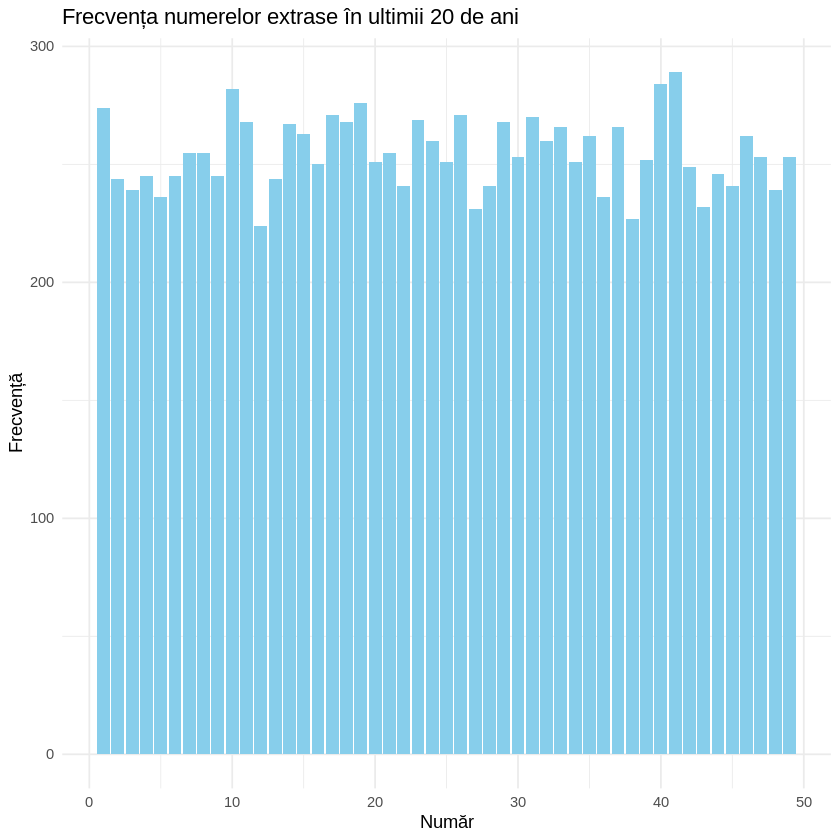

In [27]:
#ex4
set.seed(123)
numar_extrageri <- 2 * 52 * 20  # 2 extrageri/sapt timp de 20 de ani

# generam istoricul extragerilor + calcul frecvente nr extrase
numere_extrase <- sample(1:49, numar_extrageri * 6, replace = TRUE)
frecvente <- table(numere_extrase)

# cele mai frecvente 6 numere
cele_mai_frecvente_6_numere <- names(sort(frecvente, decreasing = TRUE))[1:6]
cat("Cele mai frecvent extrase 6 numere sunt:", paste(cele_mai_frecvente_6_numere, collapse = ", "), "\n")

# grafic frecventa nr extrase
library(ggplot2)
ggplot(data.frame(Numar = as.numeric(names(frecvente)), Frecventa = as.numeric(frecvente)), aes(x = Numar, y = Frecventa)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Frecvența numerelor extrase în ultimii 20 de ani", x = "Număr", y = "Frecvență")

-------------------------------------------------------------------
END_OF_EX_4
# THE END